<a href="https://colab.research.google.com/github/Akyadavv/Cardiovascular-risk-prediction/blob/main/Classification_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This classification project aims to predict whether the patient has 10 -year risk of future coronary heart disease(CHD). The information can make patients aware in advance so that they can prevent that from happening.
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
Following are the steps taken to complete this project:

 * Understanding Data : The given data set had shape of (3390, 17), It had null values, outliers and class imbalance.

  * Data vizualization and story telling: This step is important to know the
   relationship between our target variable and independent features. It is key to find out underlying trend and patterns which can help business in data driven decision making. Following are the insights I find during data vizualization:
      * Patients over the age of 51 were more vulnerable to cardiovascular diseases.
      * Patients with prior health conditions like diabetes are more likely to get these diseases.

Feature engineering and Data preprocessing: this step involves adding new feature to the dataset and prepare dataset by removing null values , removing outliers and by handling calss imbalance, so that I could apply ml models.  

ML model implementation : Applied different Ml models on the processed dataset and evaluted the metrics. following are the ML models that i used

  * Logistic Regression: Logistic regression is a popular classification algorithm that estimates the probability of an event occurring based on input features. It is efficient in handling binary classification problems and provides interpretable results.

  * Decision Tree: Decision trees are versatile models that use a hierarchical structure to make predictions. They are efficient at capturing non-linear relationships in the data and can handle both classification and regression tasks.

  * Random Forest: Random Forest is an ensemble method that combines multiple decision trees to make predictions. It is efficient in handling high-dimensional data and provides robustness against overfitting. It can handle both classification and regression tasks and performs well in capturing complex interactions between features.

  * Support Vector Machine (SVM): SVM is a powerful algorithm that separates data into different classes using a hyperplane. It is efficient in handling both linear and non-linear classification tasks and can handle high-dimensional data. SVM aims to find the optimal hyperplane that maximally separates the classes, making it effective in dealing with complex decision boundaries.

  * XGBoost Boosting: XGBoost is an ensemble method that uses a combination of weak learners, typically decision trees, to make predictions. It is efficient in handling large-scale datasets and provides excellent predictive performance. XGBoost is known for its ability to capture complex relationships in the data and handle imbalanced datasets effectively.

* Conclusion : This step involved concluding which ml model performed best and which can be use to classify in future

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [74]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [75]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/projects data/data_cardiovascular_risk.csv')

### Dataset First View

In [77]:
# Dataset First Look
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [78]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [79]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [80]:
# Dataset Duplicate Value Count
sum(df.duplicated())

0

#### Missing Values/Null Values

In [81]:
# Missing Values/Null Valudf.isna()
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## ***2. Understanding Your Variables***

In [83]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [84]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**Demographic**:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**:

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical**( history):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical**(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable** (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

### Check Unique Values for each variable.

In [85]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [86]:
# Write your code to make your dataset analysis ready.
categorical_df =[ x for x in df.columns if df[x].nunique()<10]
numerical_df = [x for x in df.columns  if x not in categorical_df]
numerical_df.remove('id')
numerical_df


['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### What all manipulations have you done and insights you found?

Created new list containg numerical and categorical feature respectively and dropped id column as it was irrelevent for us in classification.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

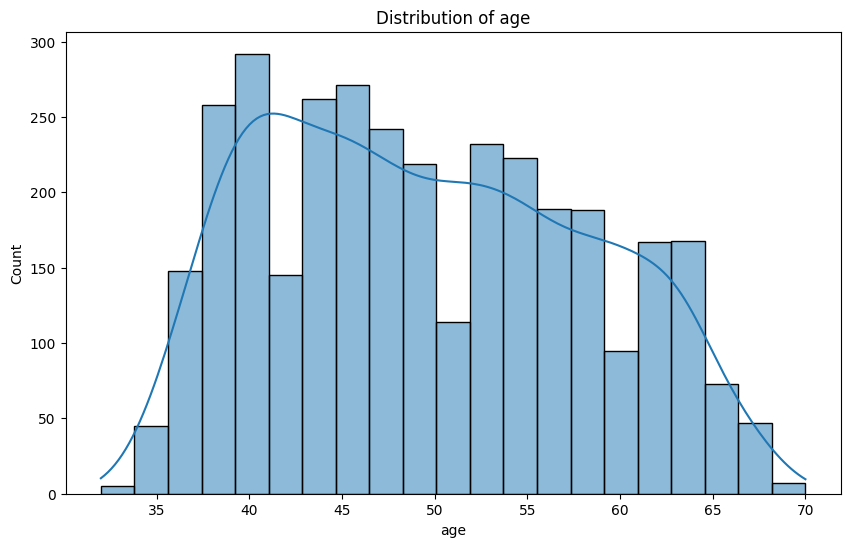

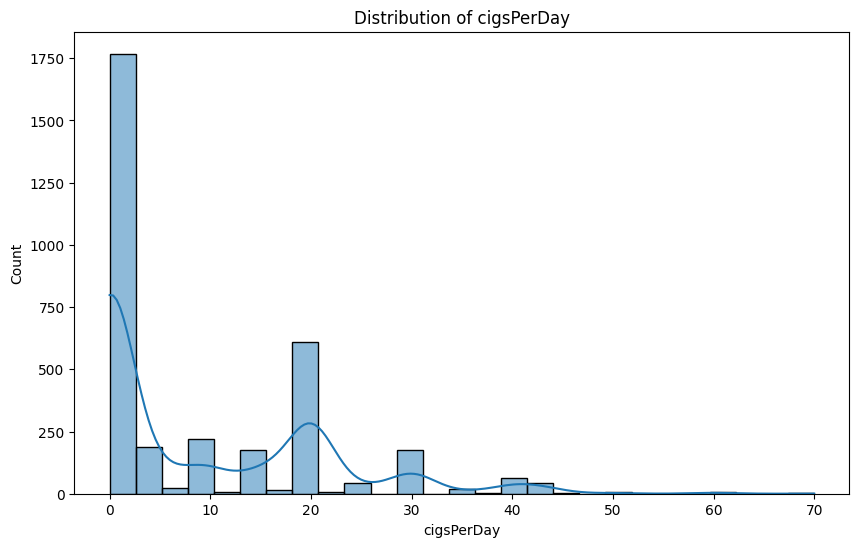

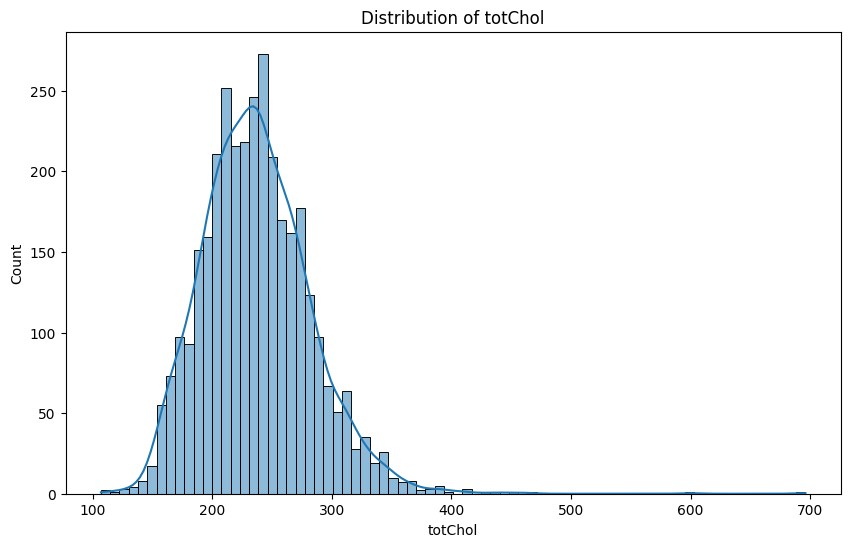

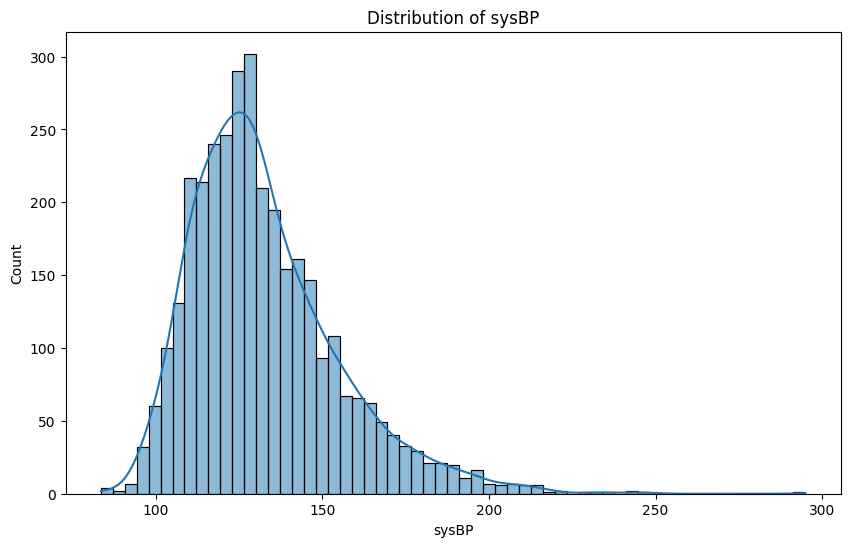

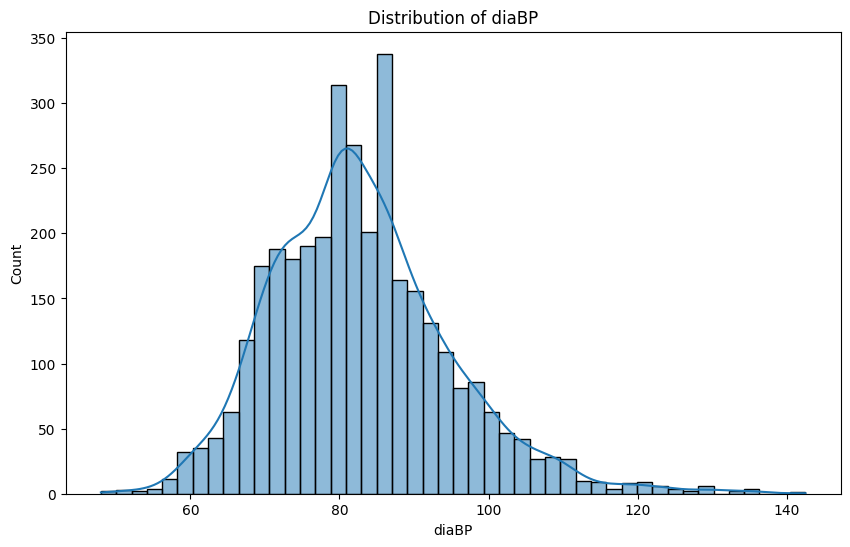

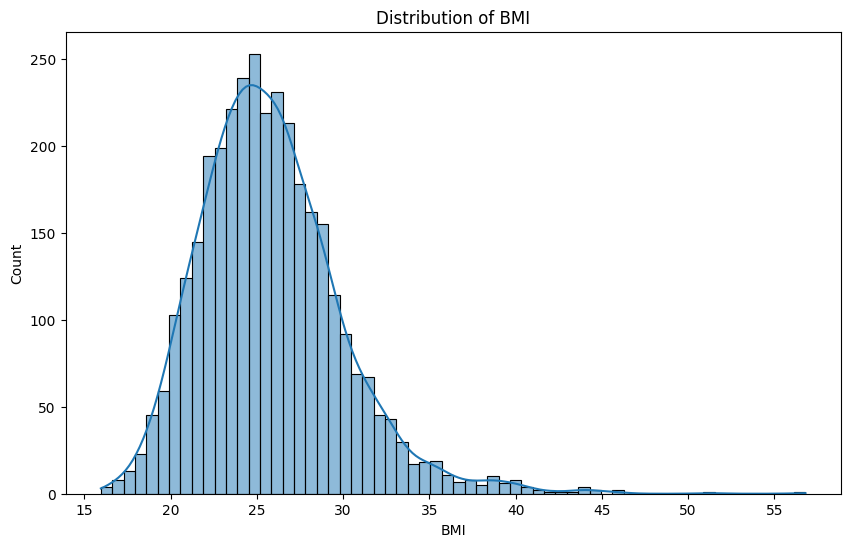

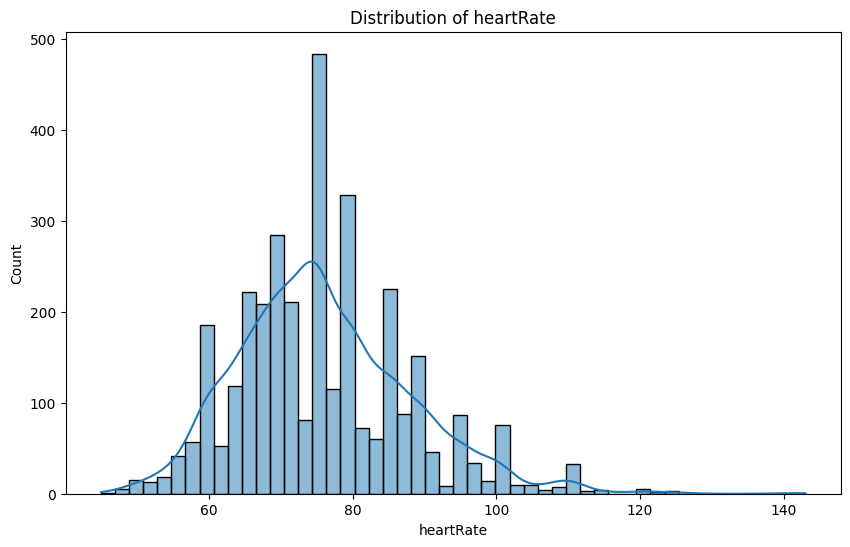

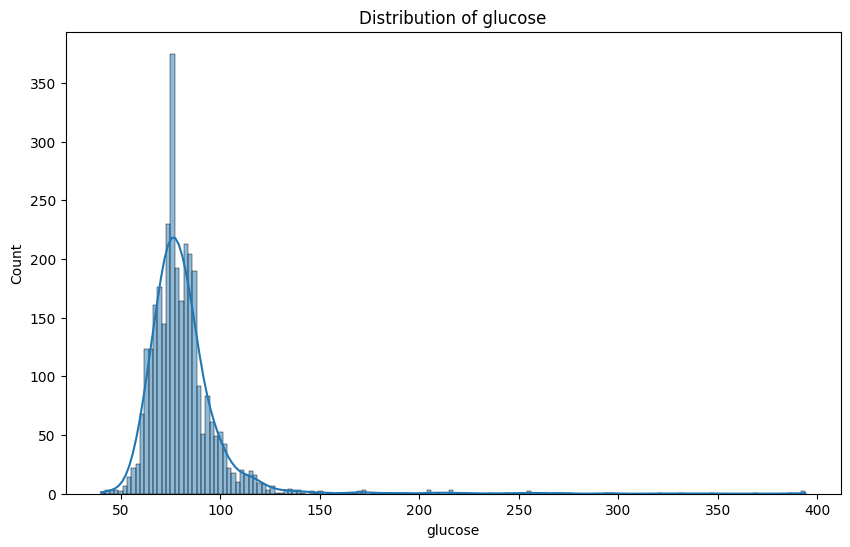

In [87]:
# Chart - 1 visualization code
for i, ii in enumerate(numerical_df):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii, kde=True)
  plt.title(f'Distribution of {ii}')
  plt.show()

##### 1. Why did you pick the specific chart?

picked histplot to check the skewness in the numerical fatures.

##### 2. What is/are the insight(s) found from the chart?

other than few numerical features all are normal distributed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

these insights will help in dealing with data which is to be analysed for the benifit of the business.

#### Chart - 2

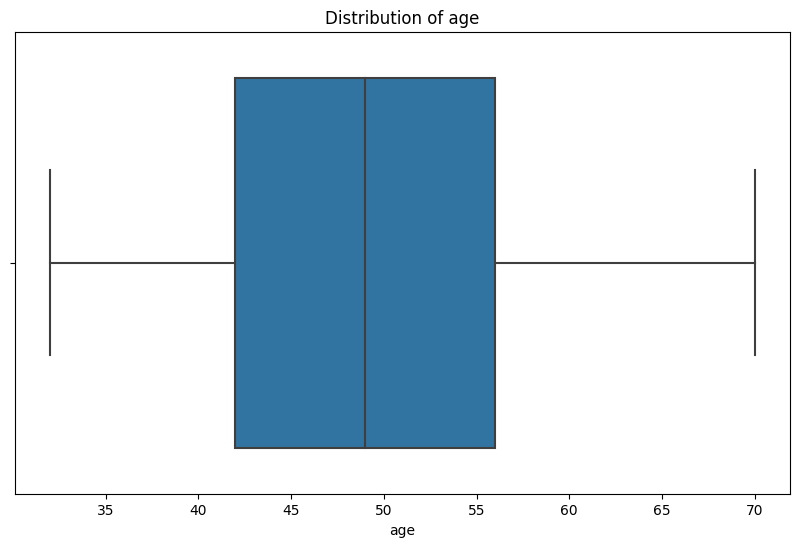

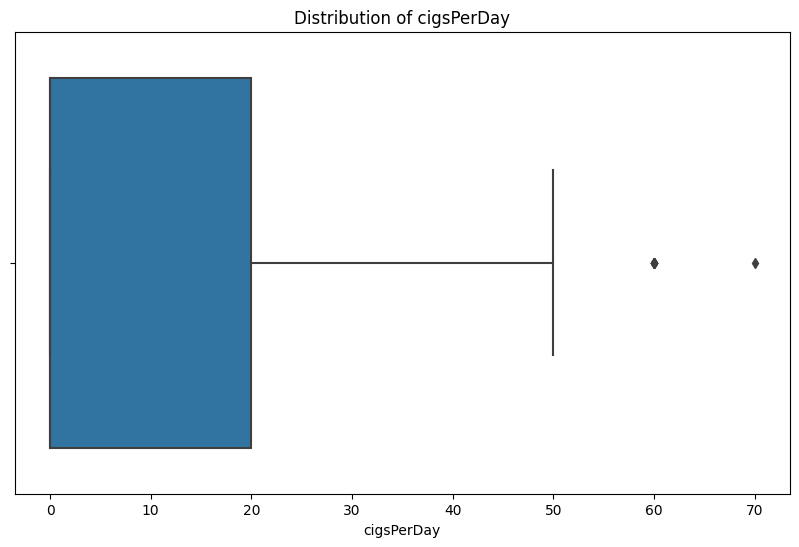

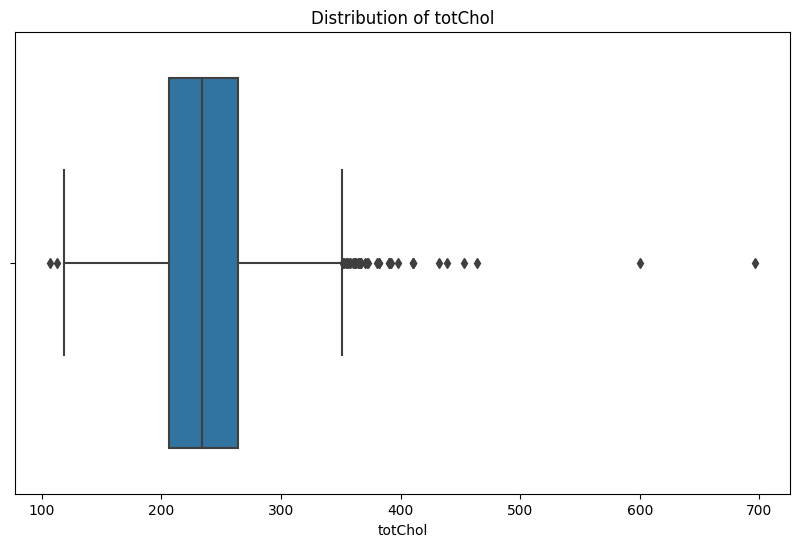

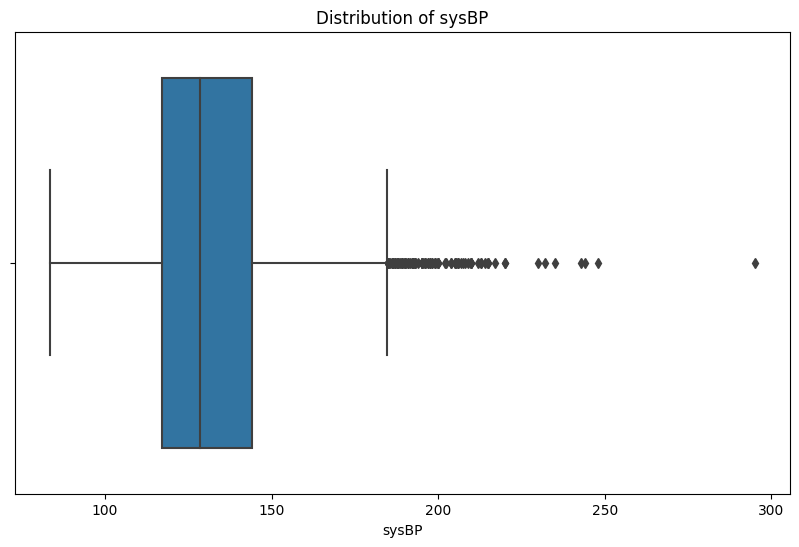

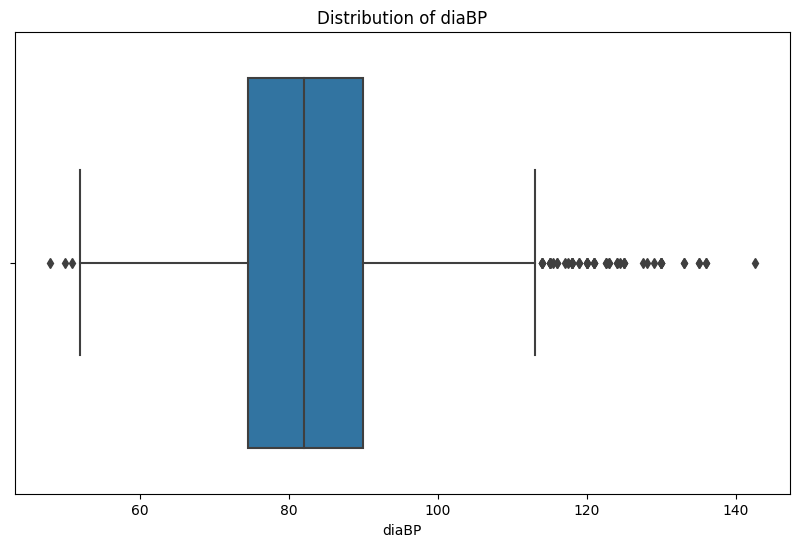

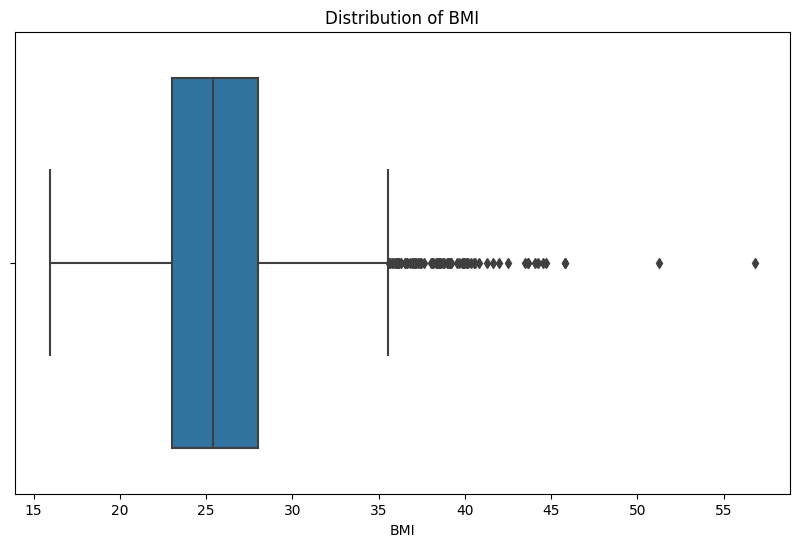

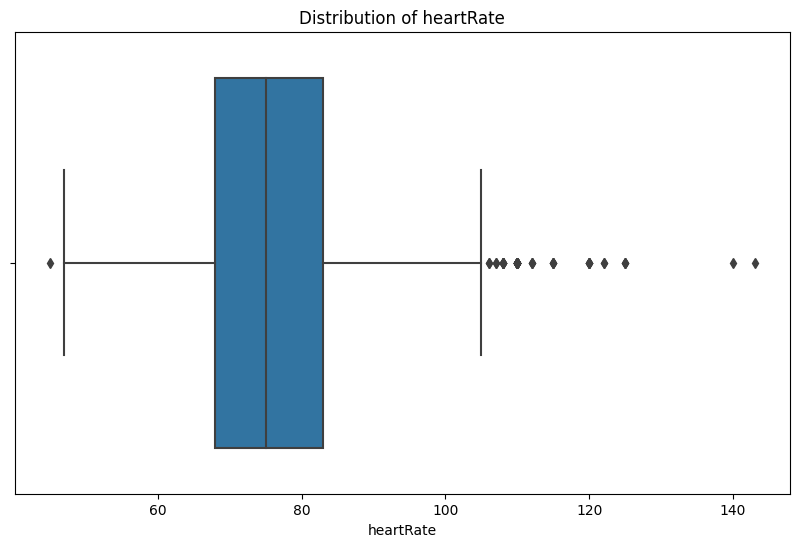

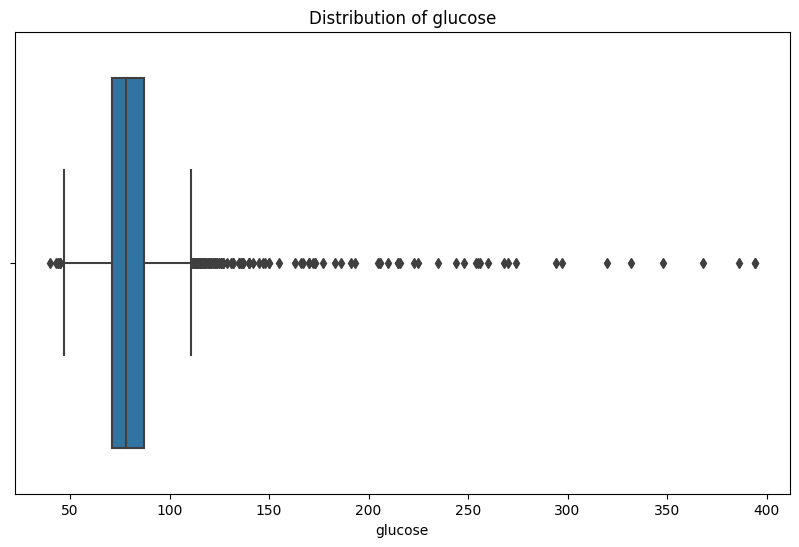

In [88]:
# Chart - 2 visualization code
# Box plot for Numeric Features

for i, ii in enumerate(numerical_df):
  plt.figure(figsize = (10,6))
  sns.boxplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

##### 1. Why did you pick the specific chart?

picked boxplot to see the presence of outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

dataset contains outliers , which is to be treated before modelling.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

patients with high conditions like high sugar can be detected early with outlier detection.  

#### Chart - 3

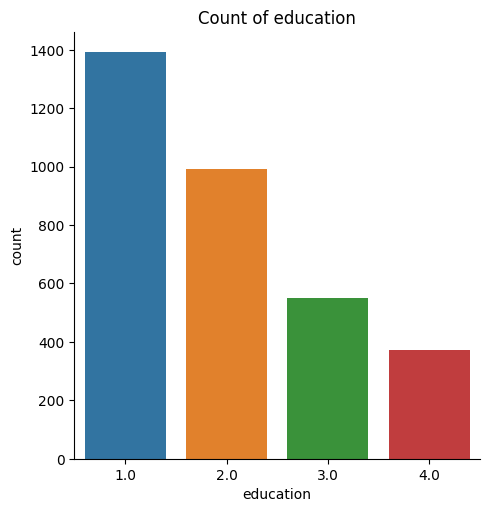

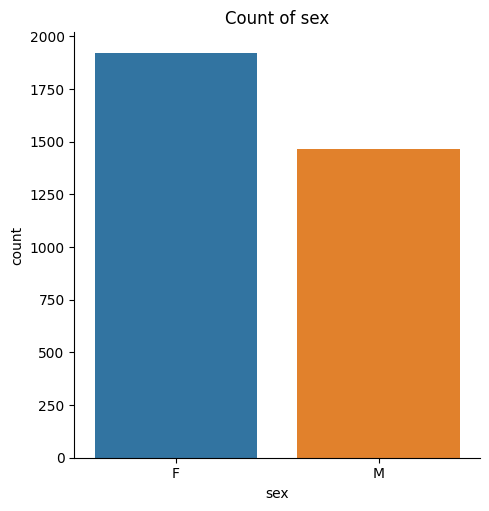

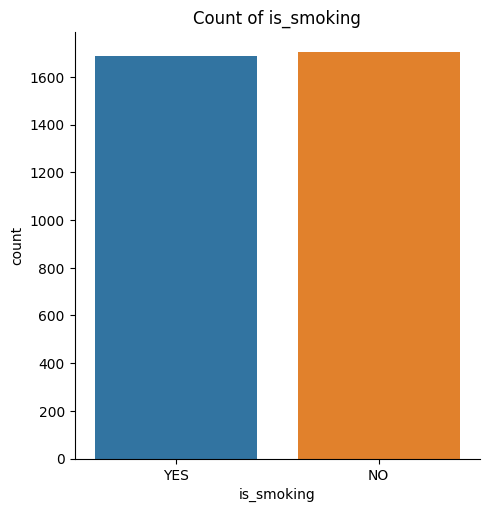

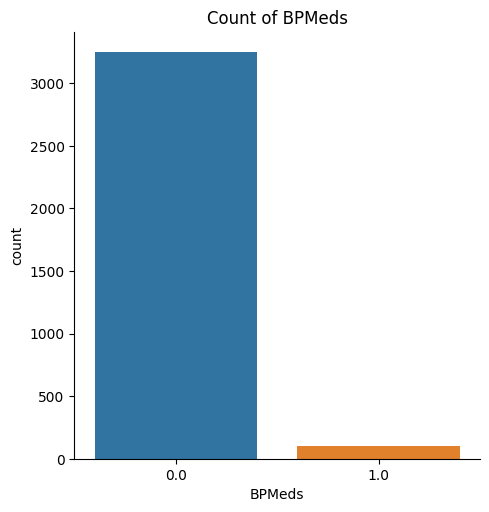

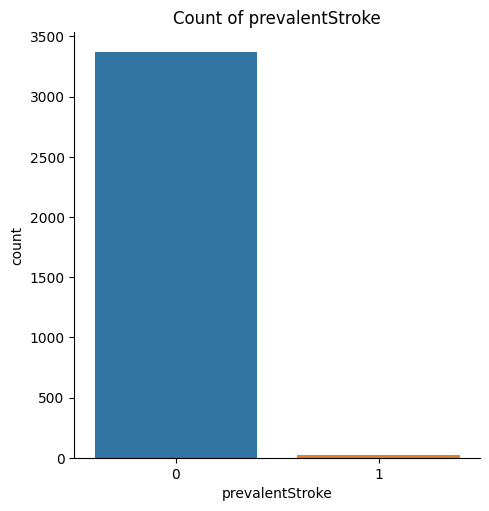

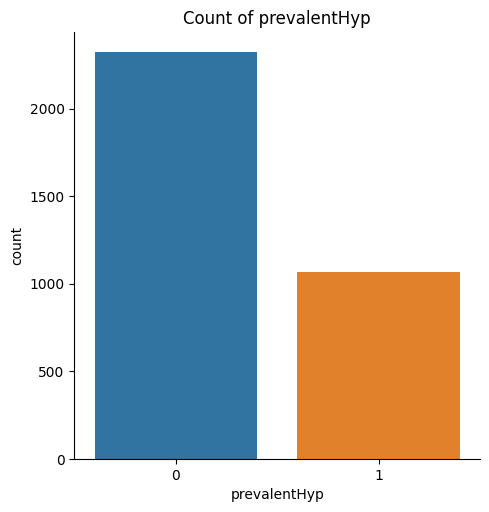

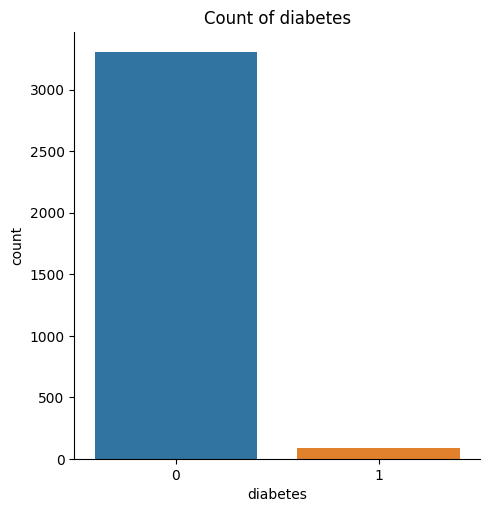

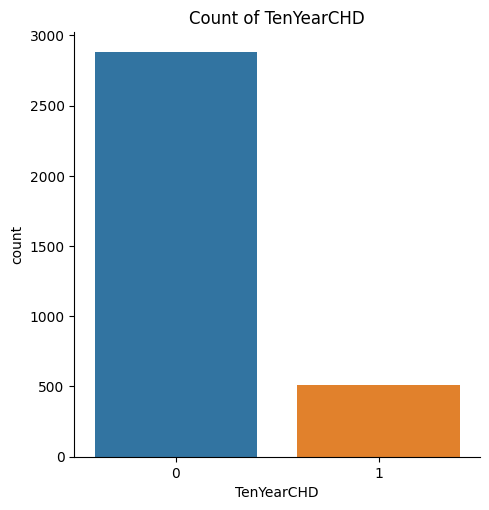

In [89]:
# Chart - 3 visualization code
# Categorical Features

for i, ii in enumerate(categorical_df):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count')
  plt.title(f'Count of {ii}')
  plt.show()

##### 1. Why did you pick the specific chart?

picked this barch chart to see the presence of imbalanced data in categorical features.

##### 2. What is/are the insight(s) found from the chart?

there are some categorical features that contains imbalanced data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

these insights can help heathcare organization to offer their customer personlized services.

#### Chart - 4

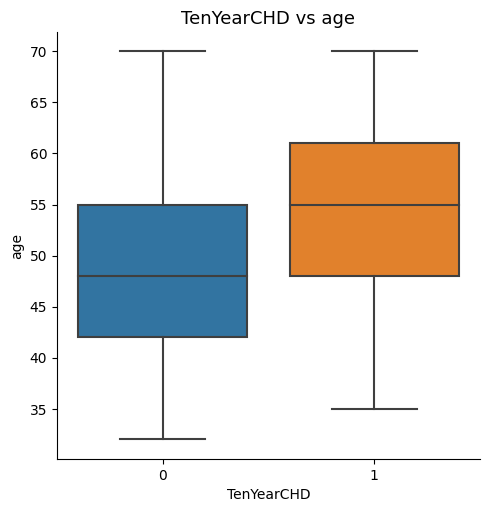

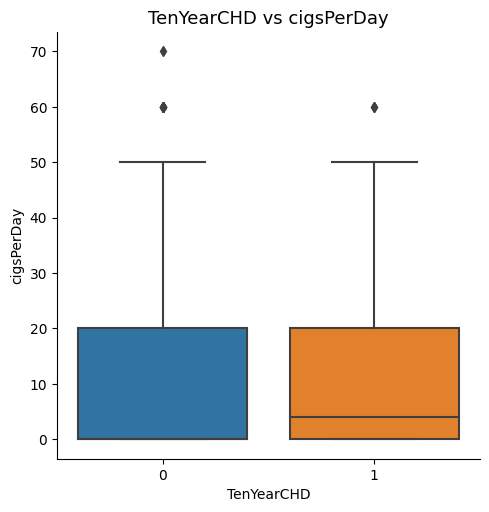

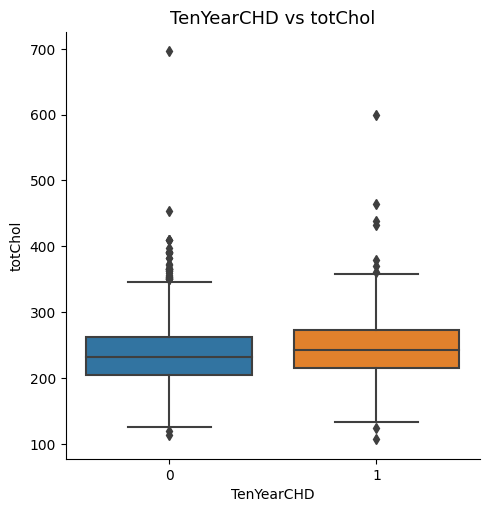

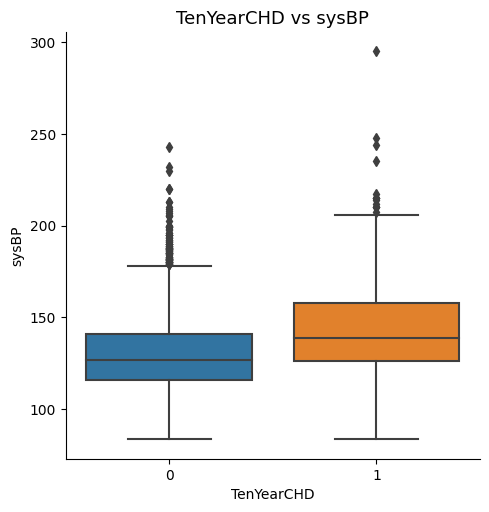

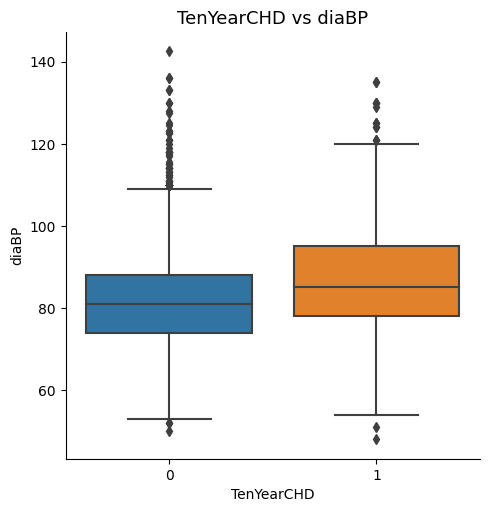

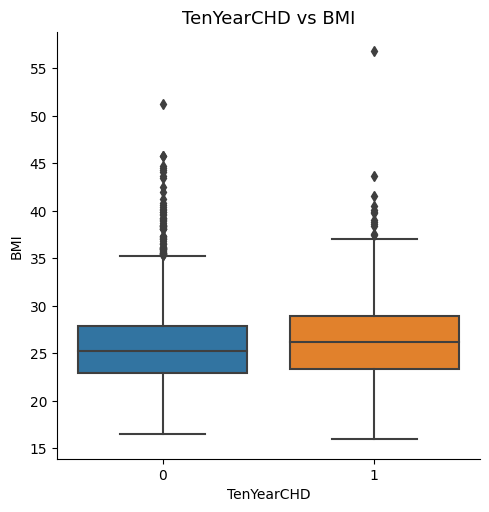

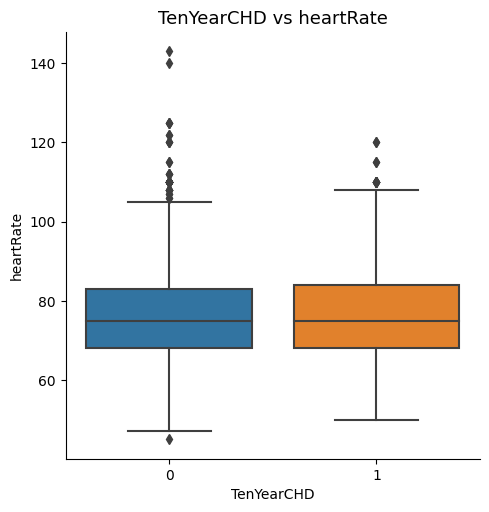

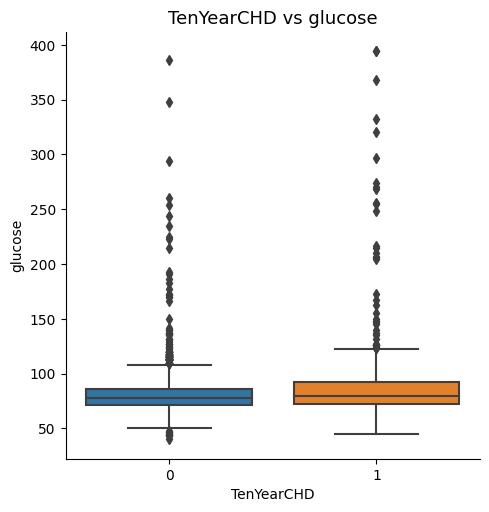

In [90]:
# Chart - 4 visualization code
# Dependent Variable vs numeric features
for i, ii in enumerate(numerical_df):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, y=ii, x= categorical_df[-1], kind='box')
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

##### 1. Why did you pick the specific chart?

Used boxplot to compare the two clases in the target variable as per different numerical features.

##### 2. What is/are the insight(s) found from the chart?

higher age range are more likely to develop Ten Year CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows that its required to give emphasis to elder people as they are more vulnerable to cardiovascular diseases.

#### Chart - 6

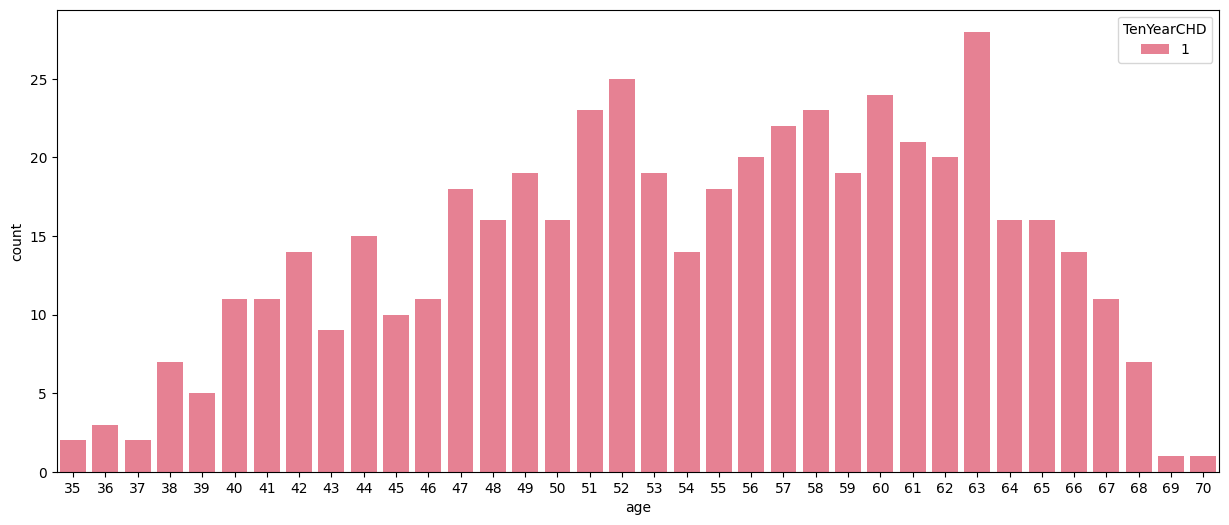

In [91]:
# Chart - 6 visualization code

# TenYearCHD = Yes vs Age

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df['TenYearCHD']==1], hue = 'TenYearCHD', palette='husl')
plt.show()

##### 1. Why did you pick the specific chart?

picked bar chart to  show which age groups are more vulnerable to the diseases.

##### 2. What is/are the insight(s) found from the chart?

After the the age of 50 people are more likely to get cardiovascular diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows that its required to give emphasis to elder people as they are more vulnerable to coronary heart diseases.



#### Chart - 7

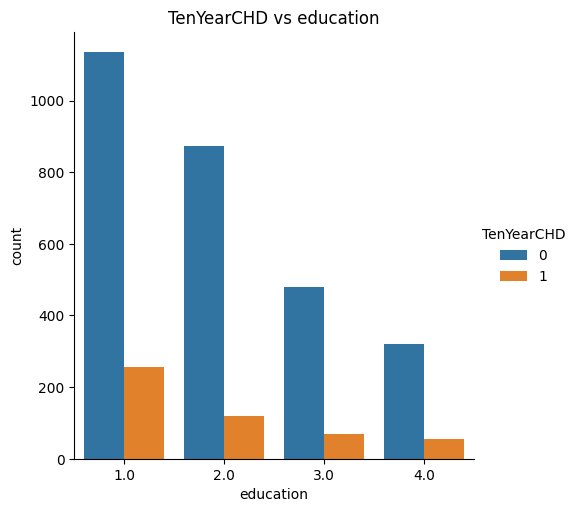

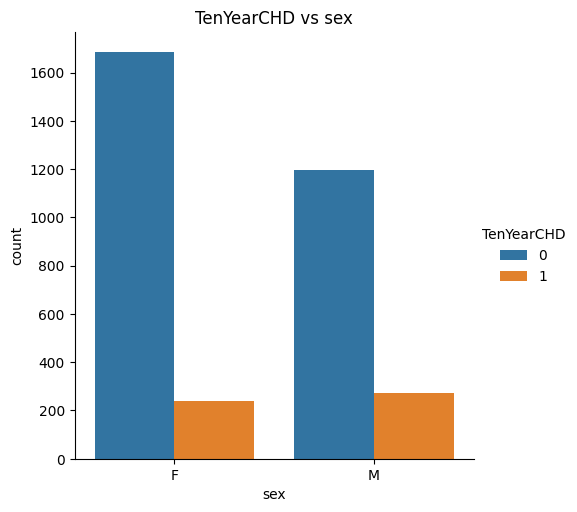

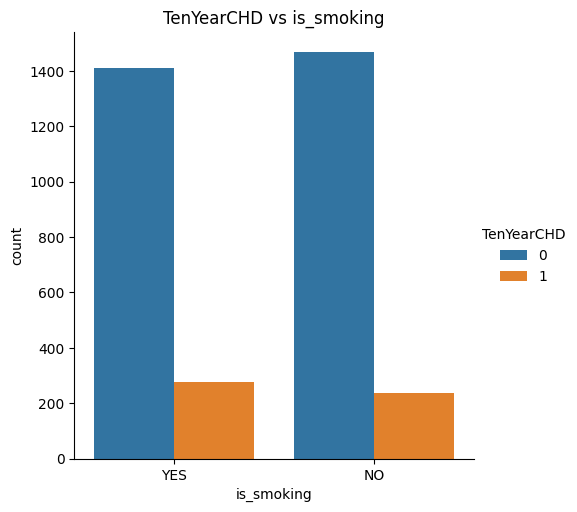

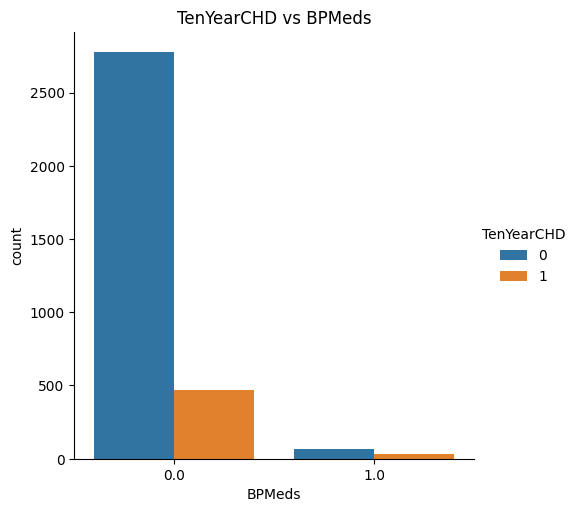

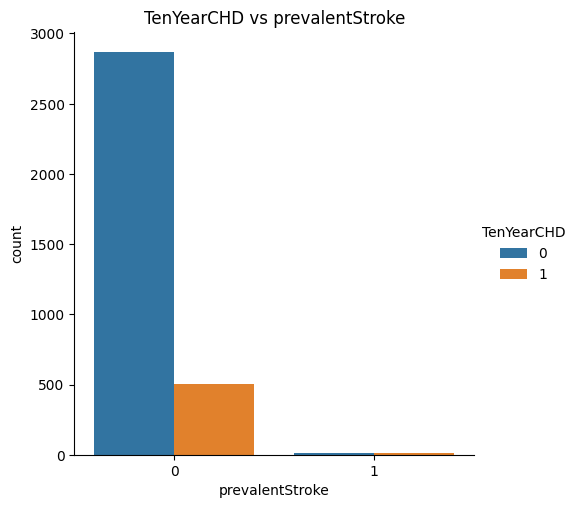

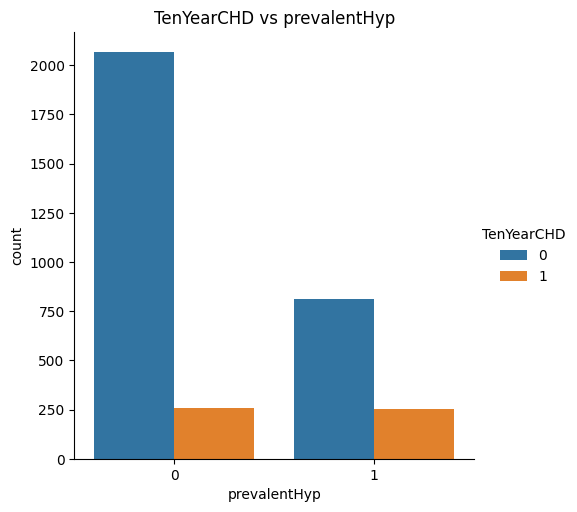

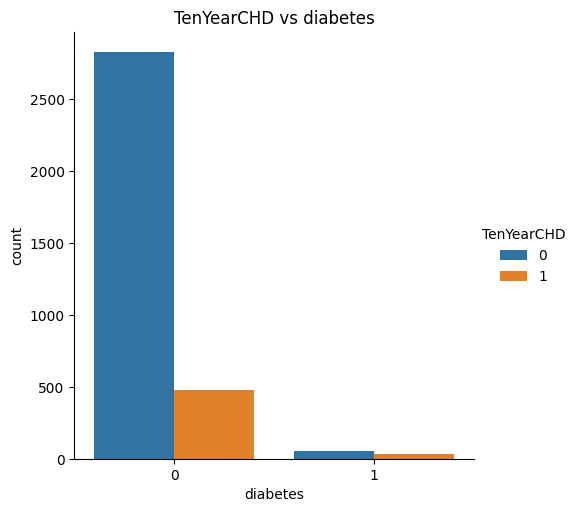

In [92]:
# Chart - 7 visualization code
# Dependent variable vs categorical features

for i, ii in enumerate(categorical_df[:-1]):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, hue=categorical_df[-1], kind='count')
  plt.title(f'TenYearCHD vs {ii}')

##### 1. Why did you pick the specific chart?

To check any relationship between target and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

patients having earlier conditions like hypertension or diabetes are more likely to have coronary heart conditions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not necessarily , but will help in providing better services to certain segment of patients.

#### Chart - 8 - Correlation Heatmap

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


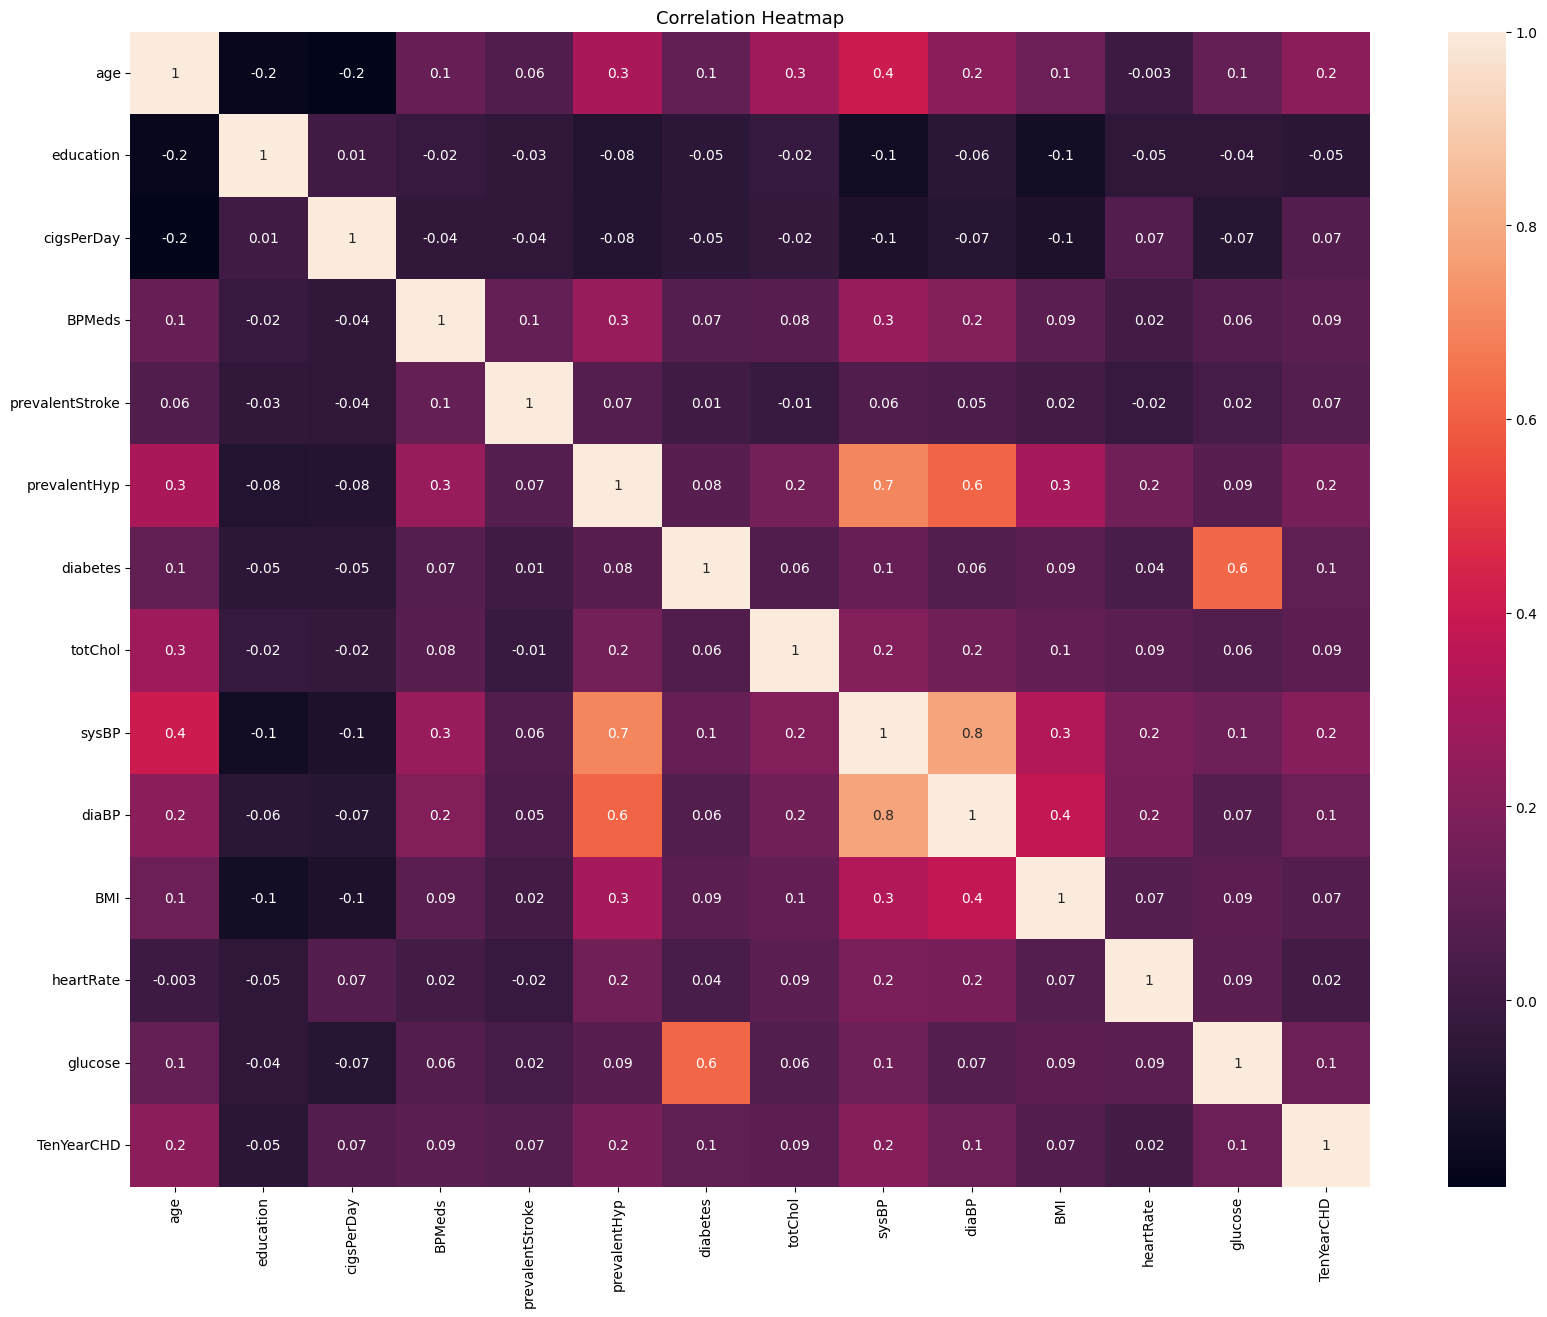

In [93]:
# Correlation Heatmap visualization code
df.drop('id', inplace=True, axis=1)
df_new = df.copy()
plt.figure(figsize = (20,15))
sns.heatmap(df_new.corr(), annot = True, fmt='.1g')
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

To see any prominent correlation between dependent and independent variable.

##### 2. What is/are the insight(s) found from the chart?

Precondition like diabetes is positively correlated to TenyearCHD
Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.6. Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.



#### Chart - 9 - Pair Plot 

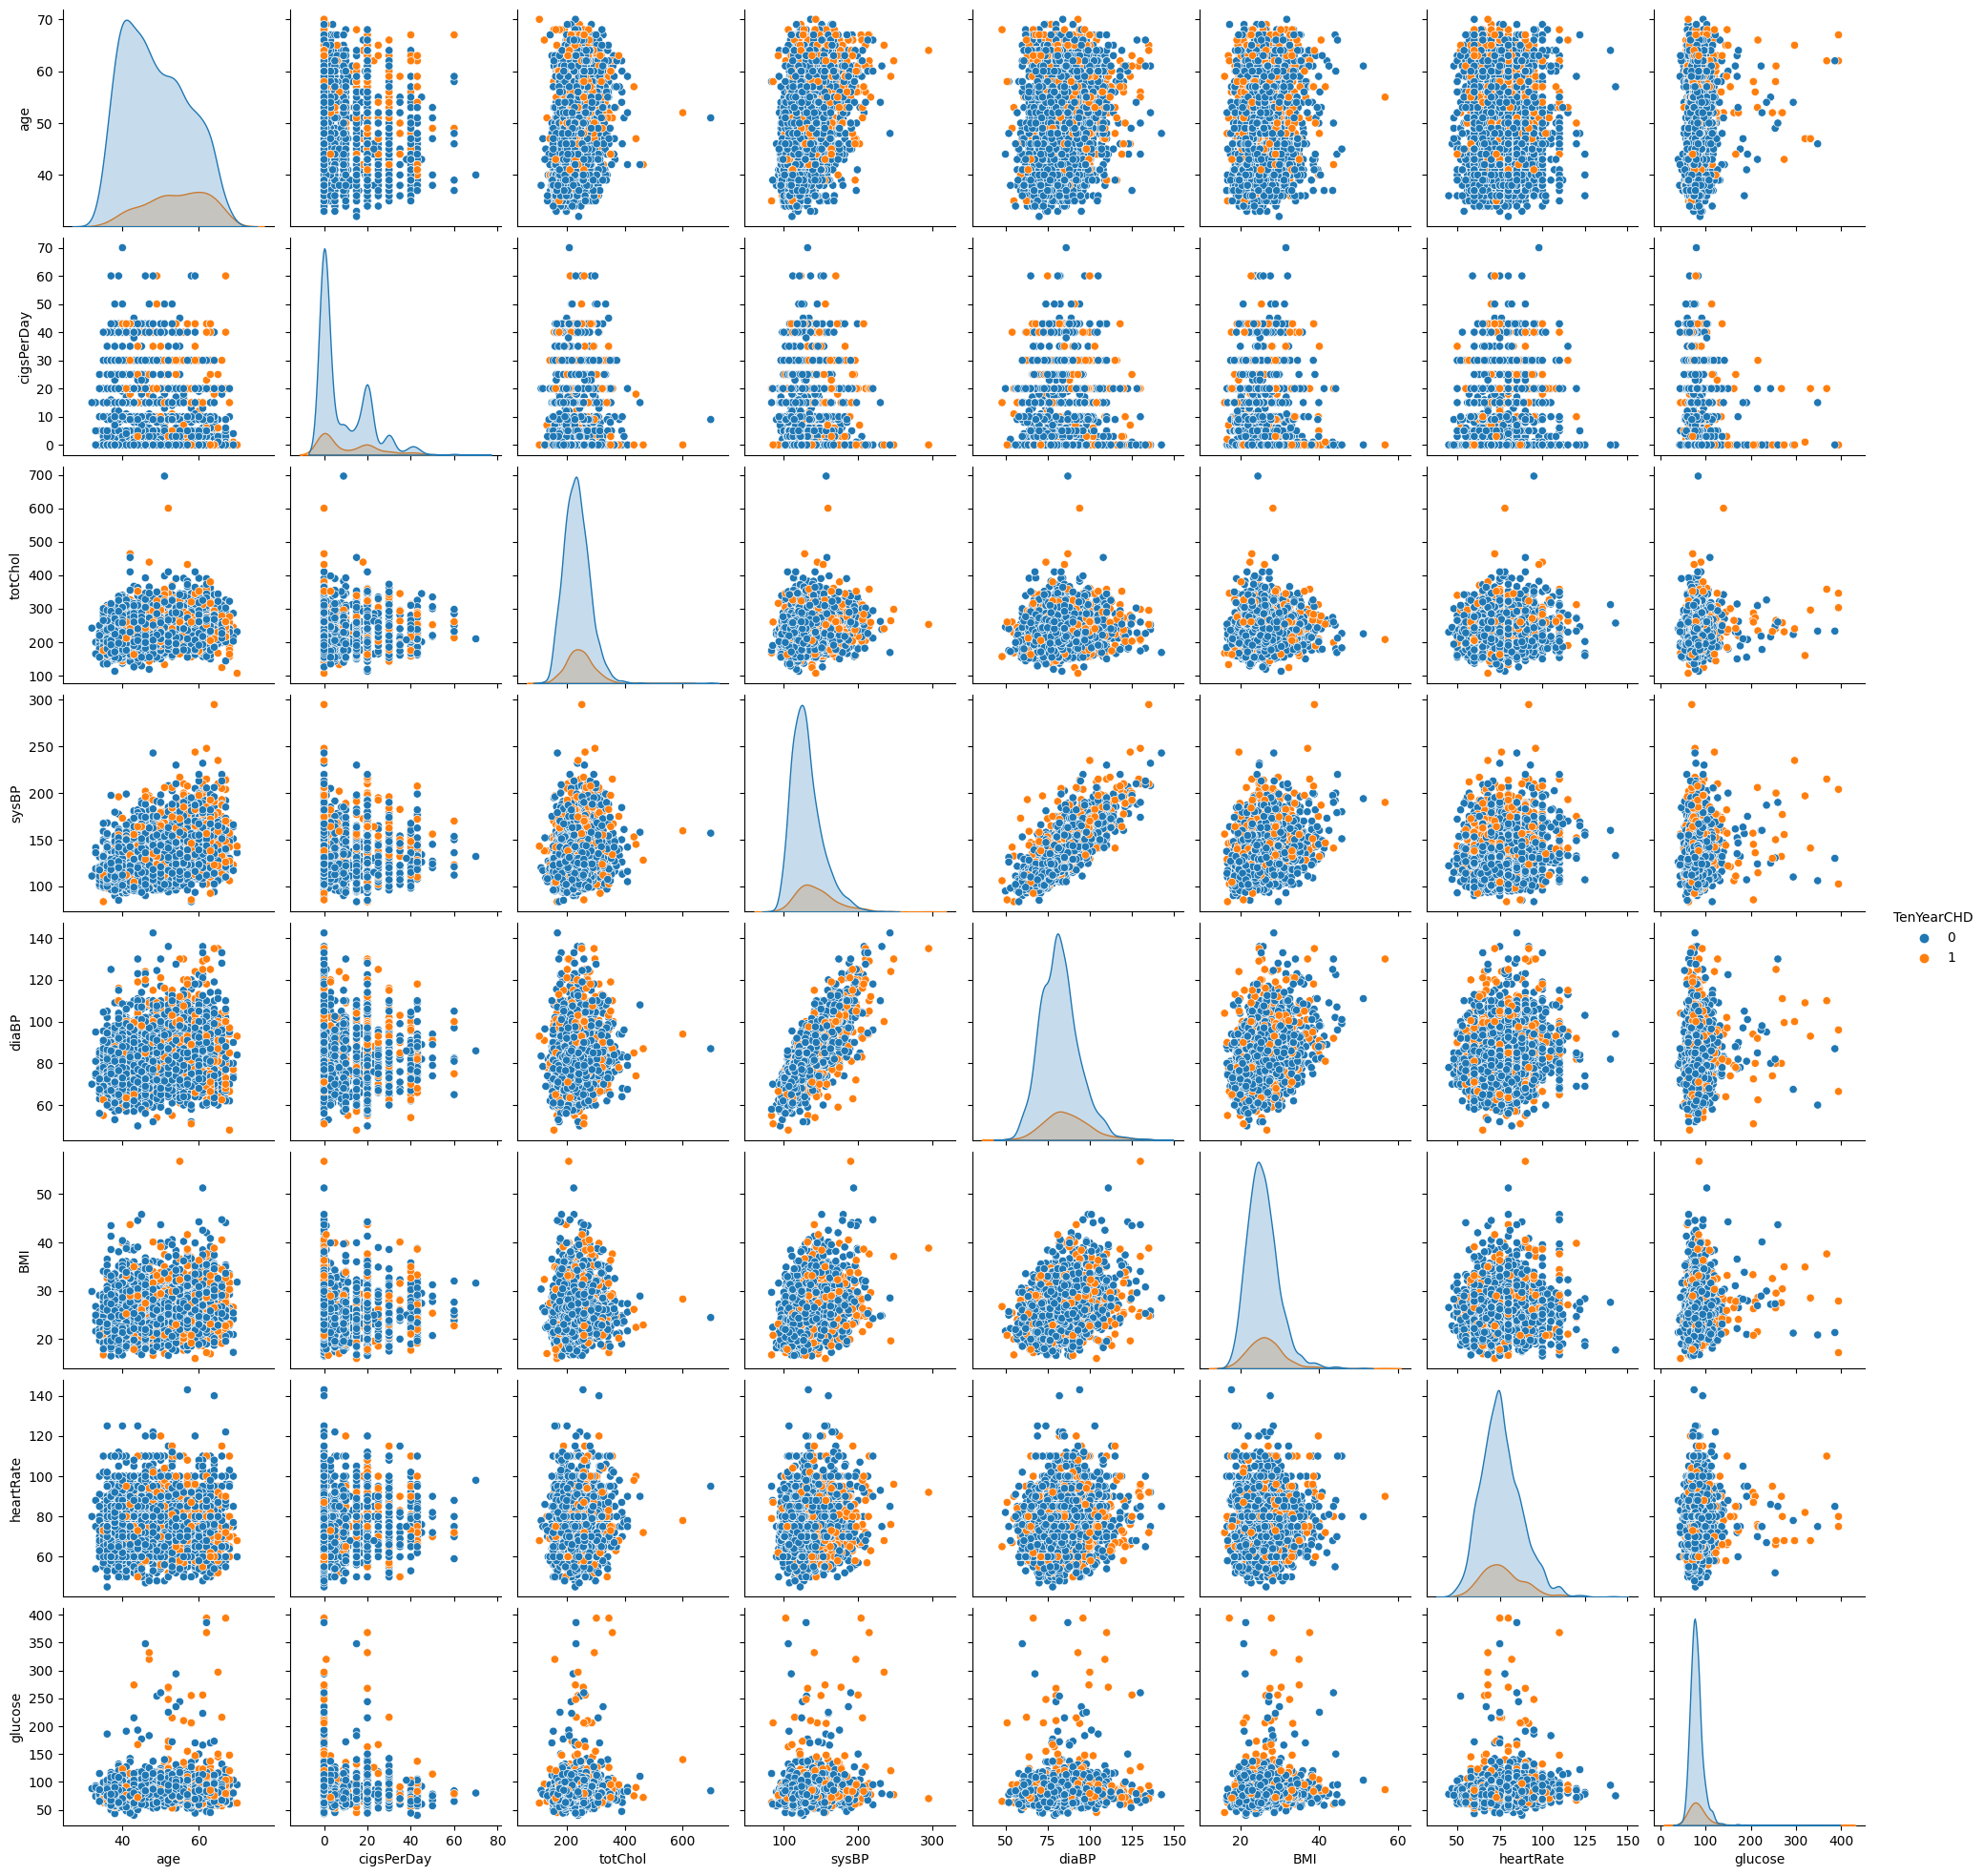

In [94]:
# Pair Plot visualization code
sns.pairplot(data=df, vars= numerical_df, hue=categorical_df[-1])
plt.show()

##### 1. Why did you pick the specific chart?

To analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

I don't see any significant patterns in the data with respect to numerical fields

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**education** contains null values, to deal with that I dropped the column as education is not correlated with our target variable 

In [95]:
# Handling Missing Values & Missing Value Imputation
df.drop('education' ,axis =1, inplace = True)

     

In [96]:
df[ [ 'totChol', 'BMI', 'heartRate', 'glucose']].describe()

totChol          BMI    heartRate      glucose
count  3352.000000  3376.000000  3389.000000  3086.000000
mean    237.074284    25.794964    75.977279    82.086520
std      45.247430     4.115449    11.971868    24.244753
min     107.000000    15.960000    45.000000    40.000000
25%     206.000000    23.020000    68.000000    71.000000
50%     234.000000    25.380000    75.000000    78.000000
75%     264.000000    28.040000    83.000000    87.000000
max     696.000000    56.800000   143.000000   394.000000

Above four columns contain null values, and It can be seen that median and mean are somewhat same. So in these four cases null values can be imputed with median.

In [97]:
df['totChol'].fillna(df['totChol'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)
df['glucose'].fillna(df['glucose'].median(), inplace = True)
df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median(),inplace = True)
df['BPMeds'].fillna(df['BPMeds'].median(),inplace = True)


In [98]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

To deal with the null values in the education column I dropped the column because it had no effect on our target feature ,for rest of the column I imputed the null values with median as median was somewhat equal to mean of the features.

### 2. Handling Outliers

In [99]:
# Handling Outliers & Outlier treatments
# Removing outliers
for col in numerical_df:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(
                         df[col] < lower_limit,lower_limit,df[col]))

In [100]:
# for i, ii in enumerate(numerical_df):
#   plt.figure(figsize = (10,6))
#   sns.boxplot(data=df, x=ii)
#   plt.title(f'Distribution of {ii}')
#   plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used interquantile range(IQR) to deal with outliers as it is one of the robust and efficient way to detect and treat outliers.

### 3. Categorical Encoding

In [101]:
# Encode your categorical column
df=pd.get_dummies(df, columns=['sex','is_smoking'],drop_first=True)
df.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  \
0   64         3.0     0.0                0             0         0    221.0   
1   36         0.0     0.0                0             1         0    212.0   
2   46        10.0     0.0                0             0         0    250.0   
3   50        20.0     0.0                0             1         0    233.0   
4   64        30.0     0.0                0             0         0    241.0   

   sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  sex_M  is_smoking_YES  
0  148.0   85.0  25.38       90.0     80.0           1      0               1  
1  168.0   98.0  29.77       72.0     75.0           0      1               0  
2  116.0   71.0  20.35       88.0     94.0           0      0               1  
3  158.0   88.0  28.26       68.0     94.0           1      1               1  
4  136.5   85.0  26.42       70.0     77.0           0      0               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used one hot encoding to encode the categorical features because there is no realtionship between the classes of the categorical features.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [102]:
# Manipulate Features to minimize feature correlation and create new features
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_M', 'is_smoking_YES'],
      dtype='object')

In [146]:
df.shape[1]

14

In [103]:
# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df)

variables         VIF
0               age   42.904746
1        cigsPerDay    4.336168
2            BPMeds    1.137327
3   prevalentStroke    1.029057
4      prevalentHyp    2.453881
5          diabetes    1.097488
6           totChol   30.658864
7             sysBP  135.869863
8             diaBP  129.760642
9               BMI   45.673133
10        heartRate   40.312939
11          glucose   44.257444
12       TenYearCHD    1.286082
13            sex_M    2.135041
14   is_smoking_YES    5.032660

 It is possible to convert systolic and diastolic blood pressure into a single metric called Mean Arterial Pressure (MAP). Mean Arterial Pressure is an average blood pressure value that takes into account both systolic and diastolic pressures, giving a better representation of overall blood pressure.
The formula to calculate Mean Arterial Pressure is:

MAP = (2 * Dia BP + Sys BP) / 3

In [104]:
df["MAP"] = round((2*df["diaBP"] + df["sysBP"])/3,2)

In [105]:
df.drop(["diaBP", "sysBP"],axis =1, inplace = True)

In [106]:
calc_vif(df)

variables        VIF
0               age  40.468006
1        cigsPerDay   4.333556
2            BPMeds   1.132510
3   prevalentStroke   1.028787
4      prevalentHyp   2.328752
5          diabetes   1.091270
6           totChol  30.625487
7               BMI  45.114946
8         heartRate  40.254108
9           glucose  44.226349
10       TenYearCHD   1.278008
11            sex_M   2.088922
12   is_smoking_YES   5.032524
13              MAP  85.119728

##### What all feature selection methods have you used  and why?

sysBP and diaBP had high VIF score, which shows high multicollinearity. These two features gives the information of Blood pressure but there is one single metric called Mean Arteial pressure(MAP) which gives better insight about the blood pressure. I made a new feature using sysBP and diaBP call MAP and dropped the two features

##### Which all features you found important and why?

Age and NO. of cigrates per day are the important factor in deciding the vulnerabilty of a patient to cardiovascular diseases.

### 5. Data Transformation

In [107]:
for i in  ['glucose','heartRate','BMI','totChol','MAP']:
  df[i]=np.log(df[i])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

used log tranformation to transform the data because it is an effecient way to deal with skewness in the data also scales the numerical column.

### 8. Data Splitting

In [109]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df.drop(['TenYearCHD','cigsPerDay'],axis=1)
y=df['TenYearCHD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=106, test_size=0.25, stratify=y)

### 6. Data Scaling

In [110]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [111]:
df

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0      64         3.0     0.0                0             0         0   
1      36         0.0     0.0                0             1         0   
2      46        10.0     0.0                0             0         0   
3      50        20.0     0.0                0             1         0   
4      64        30.0     0.0                0             0         0   
...   ...         ...     ...              ...           ...       ...   
3385   60         0.0     0.0                0             0         0   
3386   46         0.0     0.0                0             0         0   
3387   44         3.0     0.0                0             1         0   
3388   60         0.0     0.0                0             1         0   
3389   54         0.0     0.0                0             0         0   

       totChol       BMI  heartRate   glucose  TenYearCHD  sex_M  \
0     5.398163  3.233961   4.499810  4.382027           1      0   
1     5.356586  3.393501   4.276666  4.317488           0      1   
2     5.521461  3.013081   4.477337  4.543295           0      0   
3     5.451038  3.341447   4.219508  4.543295           1      1   
4     5.484797  3.274121   4.248495  4.343805           0      0   
...        ...       ...        ...       ...         ...    ...   
3385  5.564520  3.376905   4.248495  4.634729           0      0   
3386  5.293305  3.089223   4.382027  4.430817           0      0   
3387  5.863631  3.364533   4.290459  4.276666           1      1   
3388  5.252273  3.135929   4.382027  4.442651           0      1   
3389  5.662960  3.397189   4.369448  4.521789           0      0   

      is_smoking_YES       MAP  
0                  1  4.663439  
1                  0  4.798514  
2                  1  4.454347  
3                  1  4.712499  
4                  1  4.626638  
...              ...       ...  
3385               0  4.541485  
3386               0  4.267317  
3387               1  4.897840  
3388               0  4.833659  
3389               0  4.529045  

[3390 rows x 14 columns]

##### Which method have you used to scale you data and why?

Used standard scaler as most of the features are almost normally distributed.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

After plotting the valuecounts in the categorical features, I saw that our target feature that is tenyearCHD , is imbalanced as class 1 is 1/6th of class 0. 

In [112]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{1: 383, 0: 2159} {0: 2158, 1: 1727}


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used two techniques SMOTE and using class weights to treat class imbalance. SMOTE technique combined with random undersampling gives the best results as they balances each others limitation.

## ***7. ML Model Implementation***

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score
eval=pd.DataFrame()

In [114]:
def Logistic_model(x_tr,y_tr,x_te,y_te):
   
  #model 

  from sklearn.linear_model import LogisticRegression
  class_weight = {0: 1,
                1: 6}
  model=LogisticRegression(class_weight=class_weight)
  model.fit(x_tr,y_tr)
  model.get_params
  #testing on Recall score
  y_train_pred=model.predict(x_tr)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_te)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score
  #print(f'Recall score for train data using Logistic with Class weights : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Logistic with Class Weights : {recall_score(y_te,y_pred)}')
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=y_te,y_pred


  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_tr)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_te)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print(accuracy_score(y_te,y_pred))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Logistic','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

Logistic_model(X_train,y_train,X_test,y_test)

Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
1  Logistic        0.654996       0.634434      0.689295     0.703125   

   Train ROC  Test ROC  
1   0.730127  0.707682

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
class_weight = {0: 1,
                1: 6}

In [116]:
def svm_model(x_train,y_tr,x_test,y_te):

  #model

  from sklearn import svm
  from sklearn.model_selection import GridSearchCV 
  model= svm.SVC(class_weight=class_weight,probability=True)
  model.fit(x_train,y_tr)
  
  #testing for recall
  y_train_pred=model.predict(x_train)
  print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_test)
  print(classification_report(y_te,y_pred))
  print(f'Recall score for train data using SVM : {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using SVM : {recall_score(y_te,y_pred)}')
  

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))


svm_model(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2159
           1       0.33      0.77      0.46       383

    accuracy                           0.73      2542
   macro avg       0.64      0.75      0.64      2542
weighted avg       0.85      0.73      0.77      2542

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       720
           1       0.24      0.59      0.34       128

    accuracy                           0.65       848
   macro avg       0.57      0.62      0.55       848
weighted avg       0.80      0.65      0.70       848

Recall score for train data using SVM : 0.7702349869451697
Recall score for test data using SVM : 0.5859375
RF train roc-auc: 0.8287646466246702
RF test roc-auc: 0.672536892361111
Accuracy score :0.6509433962264151


In [117]:
def svm_tuned(x_train,y_tr,x_test,y_te):

  #model 
  from sklearn.model_selection import GridSearchCV 
  from sklearn import svm

  param_dict = {'C': [0.1,1,10],  
              'kernel': ['rbf','poly','linear']} 
  model= svm.SVC(probability=True,class_weight=class_weight)
  grid = GridSearchCV(model, param_dict,n_jobs=2,cv=5, verbose = 10,scoring='recall') 
  grid.fit(x_train,y_tr)
  print(model.get_params)

  #testing for Recall

  y_train_pred=grid.predict(x_train)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=grid.predict(x_test)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score,accuracy_score,roc_auc_score,roc_curve
  #print(f'Recall score for train data using SVM with CV and tuning : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using SVM with CV and tuning : {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = grid.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = grid.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'SVM','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

svm_tuned(X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
<bound method BaseEstimator.get_params of SVC(class_weight={0: 1, 1: 6}, probability=True)>


Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train ROC  \
1   SVM         0.66129        0.60967      0.746736     0.710938   0.763148   

   Test ROC  
1  0.696756

In [118]:
def xgb_model(x_train,y_tr,x_test,y_te):

  from xgboost import XGBClassifier
  model=XGBClassifier(scale_pos_weight=6)
  model.fit(x_train,y_tr)

  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)
  print(f'Recall score for train data using Xgboost: {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using Xgboost: {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

xgb_model(X_train,y_train,X_test,y_test)

Recall score for train data using Xgboost: 1.0
Recall score for test data using Xgboost: 0.1953125
RF train roc-auc: 1.0
RF test roc-auc: 0.5977647569444444
Accuracy score :0.785377358490566


In [119]:
def xgb_tuned(x_train,y_tr,x_test,y_te):
  from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
  from xgboost import XGBClassifier
  space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
          'gamma': hp.uniform ('gamma', 1,9),
          'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
          'reg_lambda' : hp.uniform('reg_lambda', 0,1),
          'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
          'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
          'n_estimators': 180,
          'seed': 0
      }
  def objective(space):
      clf=XGBClassifier(
                      n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                      reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                      colsample_bytree=int(space['colsample_bytree']),scale_pos_weight=8,random_state=22)
      
      
      clf.fit(x_train, y_tr)
      

      pred = clf.predict(x_test)
      #print(pred)
      roc = recall_score(y_te, pred>0.5)
      
      return {'loss': -roc, 'status': STATUS_OK }

  trials = Trials()
  best_hyperparams = fmin(fn = objective,
                          space = space,
                          algo = tpe.suggest,
                          max_evals = 100,
                          trials = trials)
  
  #print("The best hyperparameters are : ","\n")
  print(best_hyperparams)

  model=XGBClassifier(colsample_bytree=best_hyperparams['colsample_bytree'],
                                 gamma=best_hyperparams['gamma'],
                                 max_depth=int(best_hyperparams['max_depth']),
                                 min_child_weight=best_hyperparams['min_child_weight'],
                                 reg_alpha=best_hyperparams['reg_alpha'],
                                 reg_lambda=best_hyperparams['reg_lambda'],random_state=1,scale_pos_weight=8)
  

  model.fit(x_train,y_tr)
  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)

  print(model.get_params)

  #print(f'Recall score for train data using Xgboost with tuning: {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Xgboost with tuning: {recall_score(y_te,y_pred)}')

  ytrain_pred = model.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Xg Boost','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation


xgb_tuned(X_train,y_train,X_test,y_test)


100%|██████████| 100/100 [00:14<00:00,  6.96trial/s, best loss: -0.953125]
{'colsample_bytree': 0.5362741036789794, 'gamma': 7.839782152858236, 'max_depth': 14.0, 'min_child_weight': 1.0, 'reg_alpha': 177.0, 'reg_lambda': 0.15541069751833717}
<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5362741036789794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.839782152858236, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=1.0, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_para

Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
1  Xg Boost        0.459874       0.448113      0.853786     0.898438   

   Train ROC  Test ROC  
1   0.695238  0.659505

In [120]:
model_metrics = Logistic_model(X_train,y_train,X_test,y_test).append([svm_tuned(X_train,y_train,X_test,y_test), xgb_tuned(X_train,y_train,X_test,y_test)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
<bound method BaseEstimator.get_params of SVC(class_weight={0: 1, 1: 6}, probability=True)>
100%|██████████| 100/100 [00:14<00:00,  6.77trial/s, best loss: -0.953125]
{'colsample_bytree': 0.9860778516196741, 'gamma': 8.327787778883803, 'max_depth': 7.0, 'min_child_weight': 2.0, 'reg_alpha': 176.0, 'reg_lambda': 0.031192448220553476}
<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9860778516196741, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.327787778883803, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
         

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [121]:
model_metrics

Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
1  Logistic        0.654996       0.634434      0.689295     0.703125   
1       SVM        0.661290       0.609670      0.746736     0.710938   
1  Xg Boost        0.461448       0.448113      0.856397     0.867188   

   Train ROC  Test ROC  
1   0.730127  0.707682  
1   0.763059  0.696723  
1   0.697359  0.647423

**Modelling - using smote to handle class imbalance**

In [122]:
from sklearn.model_selection import GridSearchCV

def build_model(model, param_dict, xtrain, ytrain):

  grid = GridSearchCV(estimator=model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

  grid.fit(xtrain, ytrain)
  optimal_model = grid.best_estimator_

  print('\n\n\n')
  print('Best Parameters =', grid.best_params_)

  return optimal_model

In [123]:
# Function for prediction and printing metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model_name, optimal_model, xtrain, xtest, ytrain, ytest):

  train_pred = optimal_model.predict(xtrain)
  test_pred = optimal_model.predict(xtest)

  print('Classification report for train')
  print(classification_report(ytrain,train_pred))

  print('\n')
  print('Classification report for test')
  print(classification_report(ytest,test_pred))

  print('\n')
  print('Accuracy for train =', accuracy_score(ytrain, train_pred))
  print('Accuracy for test =', accuracy_score(ytest, test_pred))

  print('\n')
  print('Recall for train =', recall_score(ytrain, train_pred))
  print('Recall for test =', recall_score(ytest, test_pred))

  print('\n')
  print('ROC_AUC score for train =', roc_auc_score(ytrain, train_pred))
  print('ROC_AUC score for test =', roc_auc_score(ytest, test_pred))

  
  cm_train = confusion_matrix(y_smote, train_pred)
  cm_test = confusion_matrix(y_test, test_pred)
  
  conf_matrix_train = pd.DataFrame(data = cm_train, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  conf_matrix_test = pd.DataFrame(data = cm_test, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

  print('\n\n\n\n')
  
  # plt.figure(figsize = (8,5))
  
  f, axes = plt.subplots(1, 2, figsize=(15,7))
  sns.heatmap(conf_matrix_train, annot=True, fmt='d', ax=axes[0])
  axes[0].set_title('Confusion matrix for Train')

  sns.heatmap(conf_matrix_test, annot=True, fmt='d', ax=axes[1])
  axes[1].set_title('Confusion matrix for Test')
  plt.show()

### ML Model - 1

In [124]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
param_dict_lr = {'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]}
# Fit the Algorithm
lr_optimal_model = build_model(lr, param_dict_lr, X_smote, y_smote)
# Predict on the model

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END .......................................

Classification report for train
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2158
           1       0.67      0.60      0.63      1727

    accuracy                           0.69      3885
   macro avg       0.68      0.68      0.68      3885
weighted avg       0.69      0.69      0.69      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       720
           1       0.27      0.57      0.37       128

    accuracy                           0.70       848
   macro avg       0.59      0.65      0.59       848
weighted avg       0.81      0.70      0.74       848



Accuracy for train = 0.6882882882882883
Accuracy for test = 0.7028301886792453


Recall for train = 0.601621308627678
Recall for test = 0.5703125


ROC_AUC score for train = 0.67963363855851
ROC_AUC score for test = 0.6483506944444444







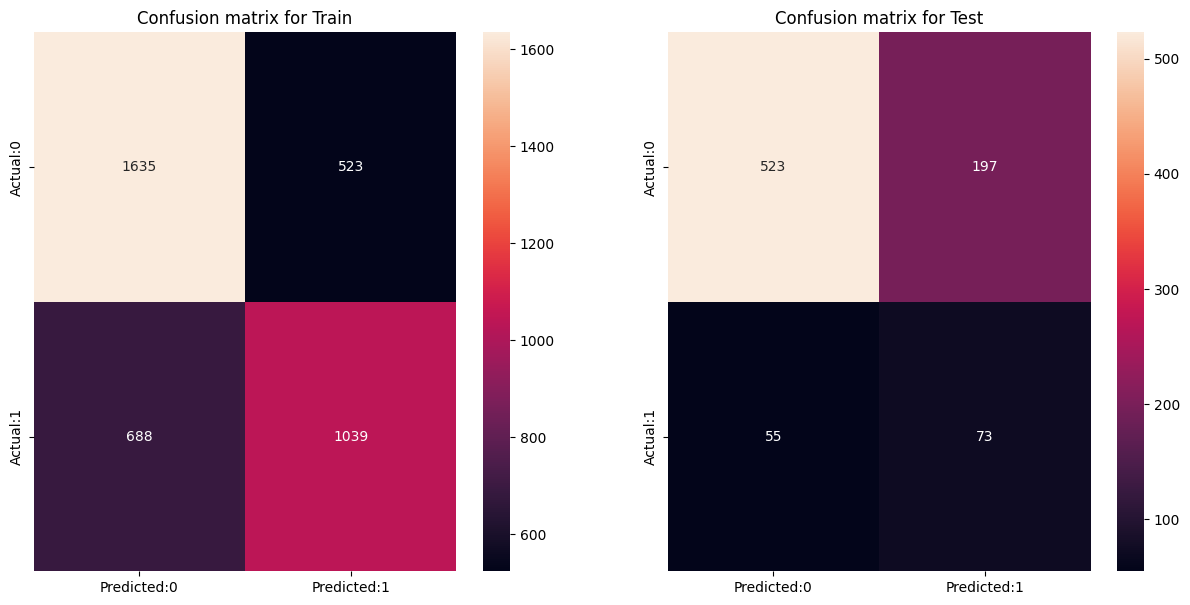

In [125]:
predict('Logistic Regression', lr_optimal_model, X_smote, X_test, y_smote, y_test)

In [126]:
lr_optimal_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.1, random_state=0)>

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [127]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=3)
param_dict_dt = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[3,4,5,6,7,8,9,10,11]}

In [128]:
dt_optimal_model = build_model(dt, param_dict_dt, X_smote, y_smote)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samp

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=12; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_features=

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=13; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, m

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto,

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=6, min_samples_split=14; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=12; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_features=aut

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=8, min_samples_split=15; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=12; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=13; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=13; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=9, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=7; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=7; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=11; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=11; total time=   0.0s
[CV] END ma

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END max

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=4; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=5; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=8; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=9; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END max_feat

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_features=sqrt, min_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.


Classification report for train
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2158
           1       0.91      0.86      0.88      1727

    accuracy                           0.90      3885
   macro avg       0.90      0.89      0.89      3885
weighted avg       0.90      0.90      0.90      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       720
           1       0.17      0.28      0.21       128

    accuracy                           0.69       848
   macro avg       0.51      0.52      0.51       848
weighted avg       0.75      0.69      0.72       848



Accuracy for train = 0.8962676962676963
Accuracy for test = 0.6886792452830188


Recall for train = 0.8552403011001737
Recall for test = 0.28125


ROC_AUC score for train = 0.8921706602813194
ROC_AUC score for test = 0.5211805555555555







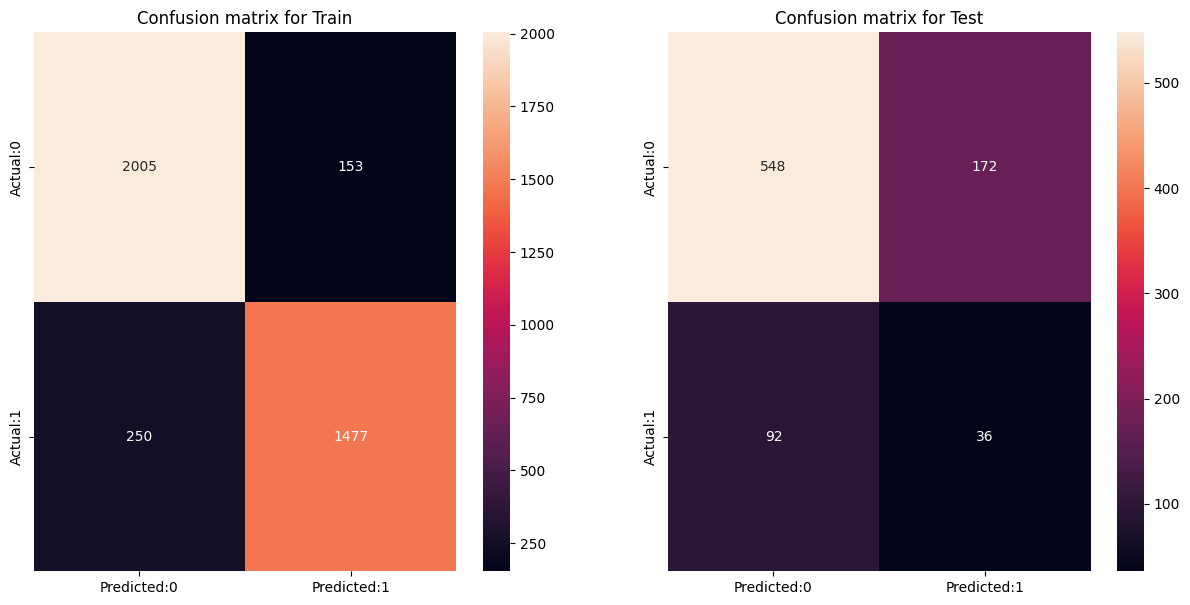

In [129]:
predict('Decision Tree', dt_optimal_model, X_smote, X_test, y_smote, y_test)

### ML Model - 3

In [130]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 5)
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100],
  }
rf_optimal_model = build_model(rf, param_dict_rf, X_smote, y_smote)
# Fit the Algorithm

# Predict on the model

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

Classification report for train
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2158
           1       0.75      0.67      0.71      1727

    accuracy                           0.75      3885
   macro avg       0.75      0.75      0.75      3885
weighted avg       0.75      0.75      0.75      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       720
           1       0.24      0.39      0.30       128

    accuracy                           0.72       848
   macro avg       0.56      0.59      0.56       848
weighted avg       0.78      0.72      0.75       848



Accuracy for train = 0.7536679536679537
Accuracy for test = 0.7240566037735849


Recall for train = 0.671685002895194
Recall for test = 0.390625


ROC_AUC score for train = 0.7454810556644644
ROC_AUC score for test = 0.5869791666666667







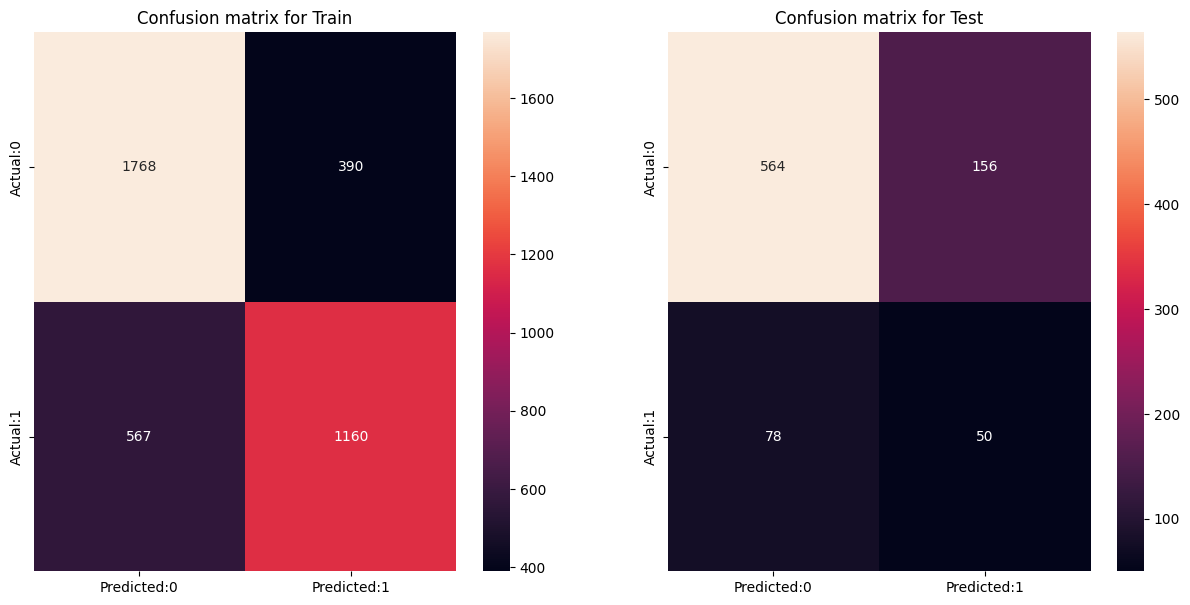

In [131]:
predict('Random Forest', rf_optimal_model, X_smote, X_test, y_smote, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [132]:
# Visualizing evaluation Metric Score chart

#### Model -4

In [133]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state= 0)
# Fit the Algorithm
param_dict_xgb = {
    'max_depth': range (2, 5, 6),
    'learning_rate': [0.05, 0.01, 0.1],
    'min_child_weight': [1,3,4]
    }
xgb_optimal_model  = build_model(xgb, param_dict_xgb, X_smote, y_smote)
# Predict on the model

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=3; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=3; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=3; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=4; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_chi

Classification report for train
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2158
           1       0.63      0.70      0.66      1727

    accuracy                           0.68      3885
   macro avg       0.68      0.69      0.68      3885
weighted avg       0.69      0.68      0.68      3885



Classification report for test
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       720
           1       0.23      0.59      0.33       128

    accuracy                           0.64       848
   macro avg       0.56      0.62      0.54       848
weighted avg       0.80      0.64      0.69       848



Accuracy for train = 0.6833976833976834
Accuracy for test = 0.6356132075471698


Recall for train = 0.7029530978575564
Recall for test = 0.5859375


ROC_AUC score for train = 0.6853505062967115
ROC_AUC score for test = 0.6151909722222221







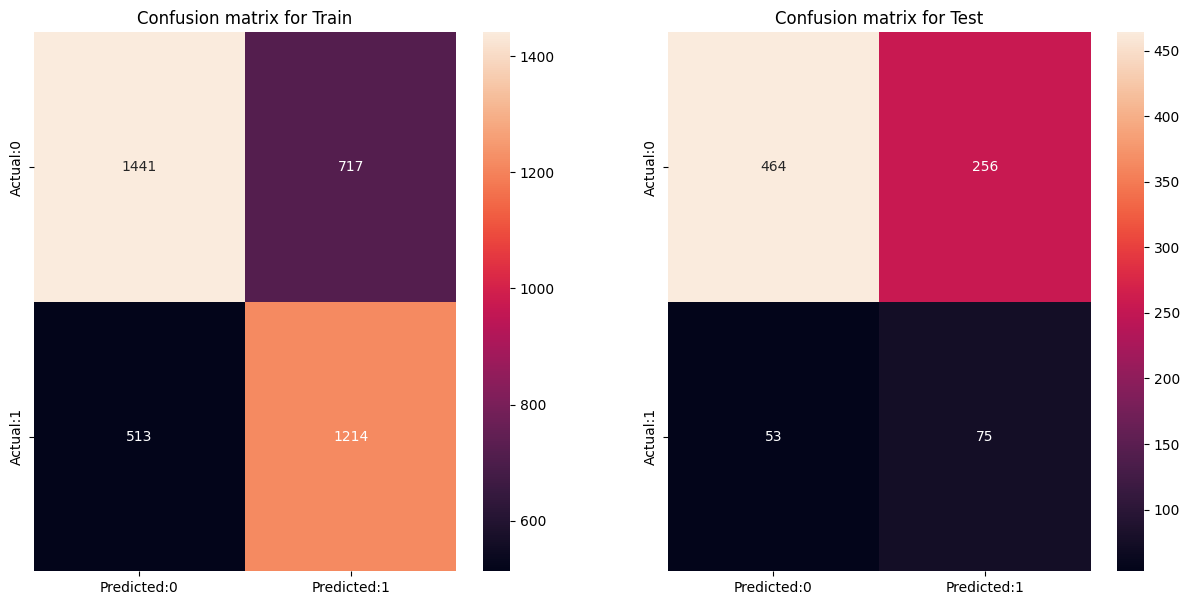

In [134]:
predict('XGBoost', xgb_optimal_model, X_smote, X_test, y_smote, y_test)
     

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this case I used combination of recall and accuracy to judge a particular model.Recall becomes an important metric in this case as we want less false negative. More false negative means patients with high chance of getting cardiovascular desease are missclassified which obviously we do not want.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

SVM modelled using class weights to deal with class imbalnce gives the best recall and accuracy as compared to others 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [135]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import shap
shap.initjs()

In [137]:
explainer_train = shap.TreeExplainer(xgb_optimal_model)
shap_values_train = explainer_train.shap_values(X_smote)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


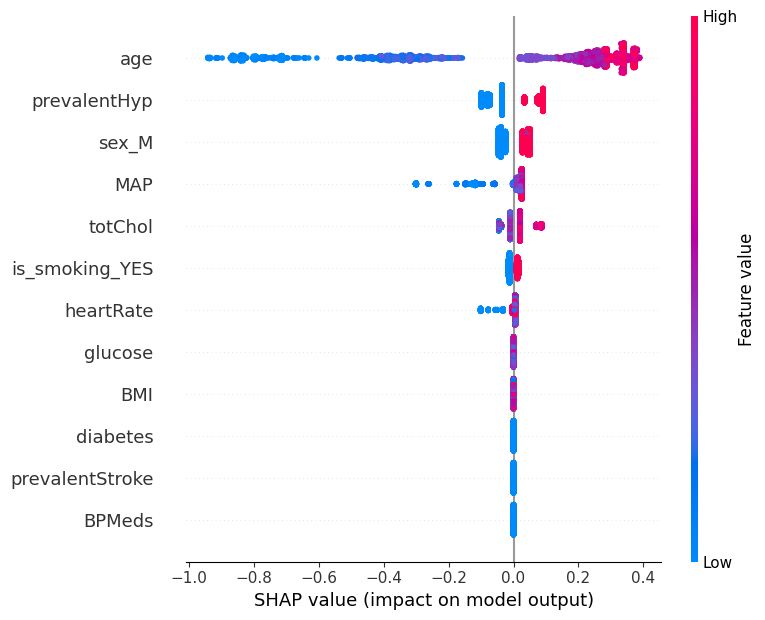

In [138]:

shap.summary_plot(shap_values_train,X_smote,feature_names=list(X.columns),plot_type='dot')

In [139]:
def feature_importance(model):
  """A function to plot the feature importance."""
  features = X.columns                                       
  importances = model.feature_importances_
  indices = np.argsort(importances)
  plt.figure(figsize=(10,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

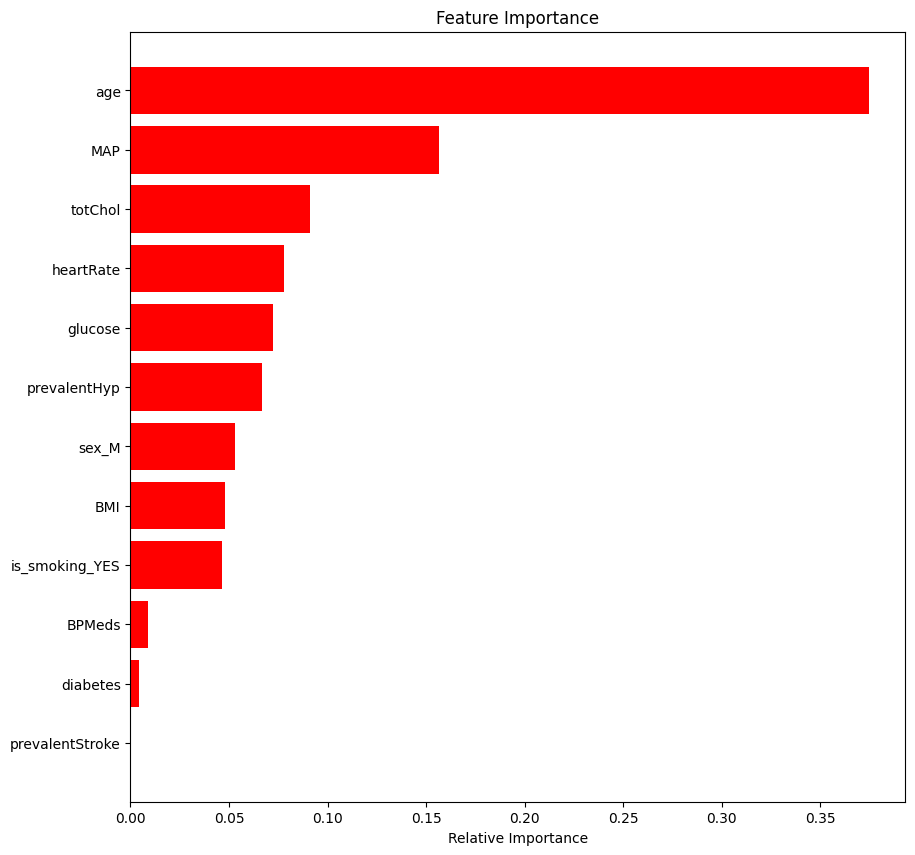

In [140]:
feature_importance(rf_optimal_model)

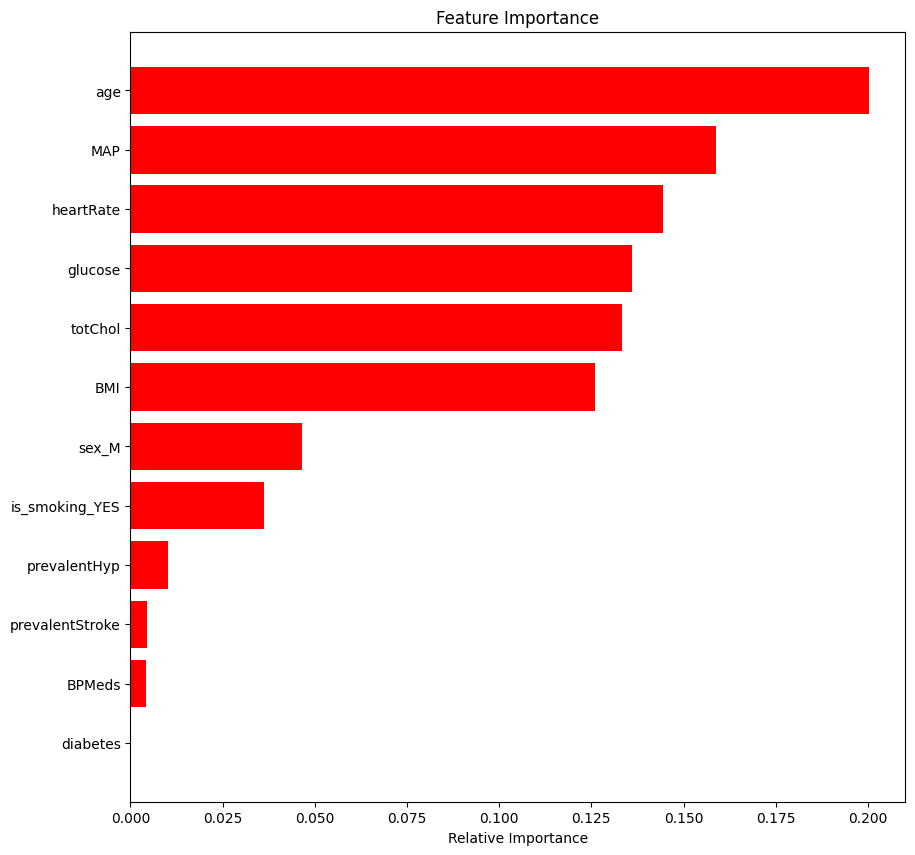

In [141]:
feature_importance(dt_optimal_model)

# **Conclusion**

In [142]:
models = [lr_optimal_model, dt_optimal_model, rf_optimal_model, xgb_optimal_model]

In [143]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(4)
        df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(4)
        df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(4)
        df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(4)
        
        i+=1

    return(df)

In [144]:
model_smote=score_model(X_smote,y_smote,X_test,y_test)
print('Scores using SMOTE')
model_smote

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.


Scores using SMOTE


Model_Name  Train accuracy  Test accuracy  Train recall  \
0      LogisticRegression          0.6883         0.7028        0.6016   
1  DecisionTreeClassifier          0.8963         0.6887        0.8552   
2  RandomForestClassifier          0.7537         0.7241        0.6717   
3           XGBClassifier          0.6834         0.6356        0.7030   

   Test recall  Train ROC-AUC  Test ROC-AUC  
0       0.5703         0.6796        0.6484  
1       0.2812         0.8922        0.5212  
2       0.3906         0.7455        0.5870  
3       0.5859         0.6854        0.6152

In [145]:
print('Scores using CLass Weights')
model_metrics

Scores using CLass Weights


Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
1  Logistic        0.654996       0.634434      0.689295     0.703125   
1       SVM        0.661290       0.609670      0.746736     0.710938   
1  Xg Boost        0.461448       0.448113      0.856397     0.867188   

   Train ROC  Test ROC  
1   0.730127  0.707682  
1   0.763059  0.696723  
1   0.697359  0.647423

In conclusion, the cardiovascular disease classification project aimed to predict the 10-year risk of future coronary heart disease (CHD) in patients using various machine learning models. The models utilized in the project included logistic regression, decision tree, random forest, support vector machine (SVM), and XGBoost boosting algorithm.

After thorough evaluation and comparison of the models, the logistic regression model emerged as the best performer. It achieved a test recall of 0.70 and an accuracy of 0.64. These metrics indicate that the logistic regression model was able to effectively identify the positive cases of CHD and achieve a reasonably accurate overall classification.

The logistic regression model's performance suggests its suitability for predicting the 10-year risk of CHD in patients based on the given set of features. Its recall score of 0.70 indicates that it successfully identified a significant portion of the true positive cases, which is crucial in this medical context. The accuracy score of 0.64 suggests that the model achieved a reasonable overall classification accuracy.